# 6.3 Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




### Import necessary libraries

In [1]:
# install non-default packages
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [2]:
import datetime
import os
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import xgboost as xgb
from xgboost import XGBClassifier
import keras_tuner as kt
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    make_scorer,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.initializers import GlorotUniform
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras_tuner import HyperParameters,RandomSearch,BayesianOptimization, Hyperband
from prettytable import PrettyTable
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Set seeds for reproducibility
random_seed = 42
os.environ['PYTHONHASHSEED'] = str(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

#mount drive
#from google.colab import drive
#drive.mount('/content/drive/')
#my_dir = '/content/drive/MyDrive/mini-project_6.3_course-02/'

Mounted at /content/drive/


# Stage 1 data

**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

In [21]:
# Start coding from here with Stage 1 dataset

### Load Data

In [3]:
# File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

data_stage_1_original = pd.read_csv(file_url)
data_stage_1 = data_stage_1_original.copy()
data_stage_1.head()


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen


In [4]:
data_stage_1.shape

(25059, 16)

## Data Preprocessing & Preparation

#### Remove features that are non-relevant and features with high cardinality or >50% missing

In [5]:
# list of features to drop
features_to_drop = []

# add LearnerCode which is non-value adding
features_to_drop.append('LearnerCode')

In [6]:
#check cardinality of features
data_stage_1.nunique()


,0
CentreName,19
LearnerCode,24877
BookingType,2
LeadSource,7
DiscountType,11
DateofBirth,4705
Gender,2
Nationality,151
HomeState,2448
HomeCity,5881


In [7]:
## drop high-cardinality features of categorical features
for col in data_stage_1.select_dtypes(include='object').columns:
  if data_stage_1[col].nunique() > 200:
    features_to_drop.append(col)

features_to_drop

['LearnerCode', 'DateofBirth', 'HomeState', 'HomeCity', 'ProgressionDegree']

**Note:**  Remove *DateofBirth* which is needed to derive 'age'

In [8]:
#  excluding DateofBirth which will be converted to age in years
features_to_drop.remove('DateofBirth')

In [9]:
# check missing value proportions for features & \n
# remove features with >50% missing
data_stage_1.isnull().sum()/data_stage_1.shape[0]*100


,0
CentreName,0.000000
LearnerCode,0.000000
BookingType,0.000000
LeadSource,0.000000
DiscountType,69.691528
DateofBirth,0.000000
Gender,0.000000
Nationality,0.000000
HomeState,64.384054
HomeCity,13.759528


In [10]:
# add features with >50% missing to be dropped. Adding by hand since
# it's only one that is not already in the list

features_to_drop.extend(['DiscountType'])
features_to_drop

['LearnerCode', 'HomeState', 'HomeCity', 'ProgressionDegree', 'DiscountType']

In [11]:
# drop features
data_stage_1 = data_stage_1.drop(features_to_drop, axis=1)
data_stage_1.head()

,CentreName,BookingType,LeadSource,DateofBirth,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity
0,ISC_Aberdeen,Agent,Standard Agent Booking,13/01/1998,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen
1,ISC_Aberdeen,Agent,Standard Agent Booking,12/2/1998,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen
2,ISC_Aberdeen,Agent,Standard Agent Booking,7/4/2000,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,University of Aberdeen
3,ISC_Aberdeen,Agent,Standard Agent Booking,18/05/1999,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,University of Aberdeen
4,ISC_Aberdeen,Agent,Standard Agent Booking,19/04/1996,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen


In [12]:
data_stage_1.shape

(25059, 11)

#### Feature Engineering

In [13]:
# Derive age in years using date-of-birth

#Get today's date
today = pd.Timestamp('now')
# convert original data to standard format
data_stage_1['DOB'] = pd.to_datetime(data_stage_1['DateofBirth'], format='mixed')
# age = (today - dateofbirth)
data_stage_1['Age'] = (today - data_stage_1['DOB']).dt.days//365
#data['Age'] = ((today - data['DOB']).dt.days / 365).round(1)

In [14]:
# check if all rows converted without errors
data_stage_1['Age'].isnull().sum()

np.int64(0)

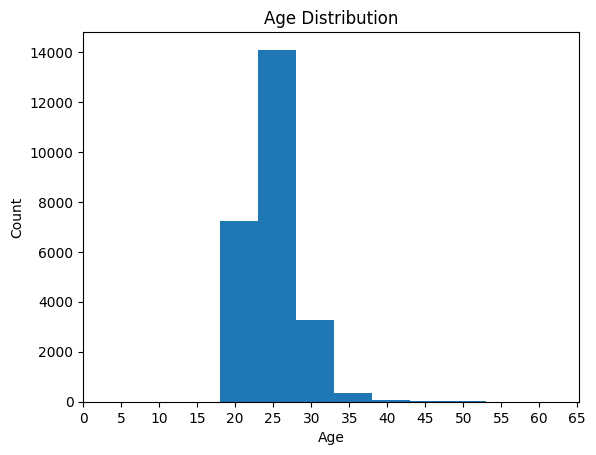

In [15]:
# plot histogram of age to do a sanity-check if anything is unusual
plt.hist(
    data_stage_1['Age'],
    bins=range(data_stage_1['Age'].min(),
               data_stage_1['Age'].max() + 5, 5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(0, data_stage_1['Age'].max() + 5, 5))
plt.show()


In [16]:
#drop original dateofbirth and interim DOB feature
data_stage_1.drop(['DOB','DateofBirth'], axis=1, inplace=True)

In [17]:
## Target feature

#rename 'CompletedCourse' as target column
data_stage_1.rename(columns={'CompletedCourse': 'Target'}, inplace=True)

# convert target variable to binary 1, 0.
# Since we are interested in predicting churn, 'CourseComplete'=No is
  # mapped to 1
data_stage_1['Target'] = data_stage_1['Target'].map({'Yes': 0.0, 'No': 1.0})
data_stage_1.head()

,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,Target,ProgressionUniversity,Age
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,0.0,University of Aberdeen,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,0.0,University of Aberdeen,26
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,0.0,University of Aberdeen,24
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,0.0,University of Aberdeen,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,0.0,University of Aberdeen,29


In [18]:
data_stage_1.shape

(25059, 11)

#### Define input data (X) and target variable (y)

In the given business context the interest is in predicting student droput. Hence, Target (CourseComplete)= False will be mapped to the positive class

In [19]:
#define input data X and target variable y
X_st1 = data_stage_1.drop('Target', axis=1).copy()
y_st1 = data_stage_1['Target'].copy()

#### Explore target variable

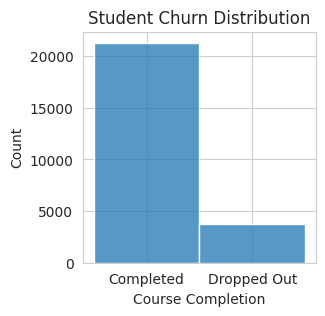

In [20]:
#plot histogram of y

sns.set_style("whitegrid")
plt.figure(figsize=(3, 3))
sns.histplot(data=y_st1,
             discrete=True,
             common_norm=False)
plt.xticks([0.0, 1.0], ['Completed','Dropped Out'])
plt.title('Student Churn Distribution')
plt.xlabel('Course Completion')
plt.ylabel('Count')
plt.show()

**Observation:** From the histogram and the normalized value counts it is clear that the dataset is heavily skewed towards the positive class which implies that simple accuracy alone will not be an ideal metric in evaluating prediction models. Since the business interest is on preventing churn it is vital to correctly predict students likely to drop out, so that preventive action can be taken i.e. **Recall** will be a key metric

#### Split data into train-test sets

**Note:** Since the data sample is considerably large, the split will be as follows:


*   20% of data as test set to get a good evaluation of generalisation to unseen data
*   Remaining 80% again split 80-20 into training-validation



In [21]:
# split dataset into train-validation-test sets

X_temp_st1, X_test_st1, y_temp_st1, y_test_st1 = train_test_split(
    X_st1, y_st1,
    test_size=0.2,
    random_state=random_seed,
    stratify=y_st1,
    )

X_train_st1, X_val_st1, y_train_st1, y_val_st1 = train_test_split(
    X_temp_st1, y_temp_st1,
    test_size=0.2,
    random_state=random_seed,
    stratify=y_temp_st1,
    )

In [22]:
# check unique value distribution of categorical across X and the 3 splits
for df in [X_st1, X_train_st1, X_val_st1, X_test_st1]:
  print(df.select_dtypes(include=['object']).nunique().sum())

397
377
327
335


**Note:** Different unique values mean that all unique values are not represented in all 3 datasets i.e. features could be dropped in One Hot Encoding if not specifically addressed.

####  Feature Transformations

In [23]:
X_st1.dtypes

,0
CentreName,object
BookingType,object
LeadSource,object
Gender,object
Nationality,object
CourseLevel,object
CourseName,object
IsFirstIntake,bool
ProgressionUniversity,object
Age,int64


**Note:**


*   All categorical features will be encoded using One Hot Encoding since there's no natural order in any feature that lends to Ordinal encoding.
*   Numerical categories will be scaled only for Neural Networks

-----------------------

*   Use sklearn ColumnTransformer for preprocessing
*   Create separate pipelines for XGB and Neural Networks
*   Use sklearn IterativeImputer to impute missing values
*   Stage 1 doesn't have any missing values, but will include the Imputer for consistency across all stages

In [26]:
# Separate features
categorical_features = X_st1.select_dtypes(include=['object']).columns.tolist()
boolean_features = X_st1.select_dtypes(include=['bool']).columns.tolist()
numerical_features = X_st1.select_dtypes(include=['number']).columns.tolist()

# Use a temp encoder only to get all possible categories across full dataset (X_st1)
tmp_encoder = OneHotEncoder(
    handle_unknown='ignore', sparse_output=False, drop=None
    )
tmp_encoder.fit(X_st1[categorical_features])
full_categories = tmp_encoder.categories_   # List of arrays for each categorical column
full_ohe_features = tmp_encoder.get_feature_names_out(categorical_features)

#define common transformers
numeric_imputer = IterativeImputer(random_state=random_seed)

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False,
        drop=None,
        categories=full_categories  # force encoder to include all categories
    ))
])

bool_transformer = FunctionTransformer(lambda x: x.astype(int))

# numeric pipeline for NN - imput+scale
numeric_nn_transformer = Pipeline([
    ('imputer', numeric_imputer),
    ('scaler', StandardScaler())
])

# numeric pipeline for XGB - impute only
numeric_xgb_transformer = Pipeline([
    ('imputer', numeric_imputer)
])

# NN column transformer
preprocessor_nn = ColumnTransformer([
    ('num', numeric_nn_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features),
    ('bool', bool_transformer, boolean_features)
])

# XGB column transformer
preprocessor_xgb = ColumnTransformer([
    ('num', numeric_xgb_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features),
    ('bool', bool_transformer, boolean_features)
])

# fit-transform
X_train_nn_st1 = preprocessor_nn.fit_transform(X_train_st1)
X_val_nn_st1 = preprocessor_nn.transform(X_val_st1)
X_test_nn_st1 = preprocessor_nn.transform(X_test_st1)

X_train_xgb_st1 = preprocessor_xgb.fit_transform(X_train_st1)
X_val_xgb_st1 = preprocessor_xgb.transform(X_val_st1)
X_test_xgb_st1 = preprocessor_xgb.transform(X_test_st1)

# Use full_ohe_features from temp encoder to get correct feature names
feature_names = numerical_features + list(full_ohe_features) + boolean_features

# Convert to DataFrames
X_train_nn_st1 = pd.DataFrame(
    X_train_nn_st1, columns=feature_names, index=X_train_st1.index
    )
X_val_nn_st1 = pd.DataFrame(
    X_val_nn_st1, columns=feature_names, index=X_val_st1.index
    )
X_test_nn_st1 = pd.DataFrame(
    X_test_nn_st1, columns=feature_names, index=X_test_st1.index
    )

X_train_xgb_st1 = pd.DataFrame(
    X_train_xgb_st1, columns=feature_names, index=X_train_st1.index
    )
X_val_xgb_st1 = pd.DataFrame(
    X_val_xgb_st1, columns=feature_names, index=X_val_st1.index
    )
X_test_xgb_st1 = pd.DataFrame(
    X_test_xgb_st1, columns=feature_names, index=X_test_st1.index
    )

#  Merge train + val sets for final model retraining
X_full_nn_st1 = pd.concat([X_train_nn_st1, X_val_nn_st1], axis=0)
X_full_xgb_st1 = pd.concat([X_train_xgb_st1, X_val_xgb_st1], axis=0)
y_full_st1 = pd.concat([y_train_st1, y_val_st1], axis=0)


In [27]:
X_train_nn_st1.shape

(16037, 399)

In [28]:
#confirm equal distribution of target classes across sets
print("Training set\n",y_train_st1.value_counts(normalize=True))
print("\nVal set\n",y_val_st1.value_counts(normalize=True))
print("\nTest set\n",y_test_st1.value_counts(normalize=True),)


Training set
 Target
0.0    0.850221
1.0    0.149779
Name: proportion, dtype: float64

Val set
 Target
0.0    0.850125
1.0    0.149875
Name: proportion, dtype: float64

Test set
 Target
0.0    0.85016
1.0    0.14984
Name: proportion, dtype: float64


## Functions used in Modeling

#### Common functions

In [29]:

## Common functions for XGBoost & NN


# get model predictions for a given threshold
def predict_model(model, X, threshold=0.5, return_proba=True):
    """
    Predicts class labels and  probabilities for binary classifiers.

    Args:
        model: only XGBClassifier or Keras Model.
        threshold: Classification threshold.
        return_proba: If True, return both y_pred and y_pred_proba.

    Returns:
        y_pred: Predicted class labels (0 or 1).
        y_pred_proba : Probabilities of positive class.
    """
    if isinstance(model, XGBClassifier):
        y_pred_proba = model.predict_proba(X)[:, 1]
    elif isinstance(model, keras.Model):
        y_pred_proba = model.predict(X, verbose=0).flatten()
    else:
        raise ValueError("Unsupported model type. Must be XGBClassifier or Keras Model.")

    y_pred = (y_pred_proba >= threshold).astype(int)

    if not return_proba:
        return y_pred
    return y_pred, y_pred_proba

#function to evaluate model and return metrics
def evaluate_model(y_true, y_pred, y_pred_proba=None):
    """
    Calculates classification metrics.

    Args:
        y_true: True labels.
        y_pred: Predicted labels (0 or 1).
        y_pred_proba: Predicted probabilities for ROC AUC.

    Returns:
        dict of metrics.
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0)
    }

    if y_pred_proba is not None:
        try:
            metrics['auc'] = roc_auc_score(y_true, y_pred_proba)
        except:
            metrics['auc'] = float('nan')  #Error handling
    else:
        metrics['auc'] = float('nan')  # auc cannot be calculated

    return metrics

# function to print metrics for train-val-test for given model
def print_metrics(
    model, #model
    model_name, #label
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    threshold=0.5
):
    # Get predictions and probabilities
    y_pred_train, y_proba_train = predict_model(model, X_train, threshold)
    y_pred_val, y_proba_val = predict_model(model, X_val, threshold)
    y_pred_test, y_proba_test = predict_model(model, X_test, threshold)

    # Evaluate
    metrics_train = evaluate_model(y_train, y_pred_train, y_proba_train)
    metrics_val = evaluate_model(y_val, y_pred_val, y_proba_val)
    metrics_test = evaluate_model(y_test, y_pred_test, y_proba_test)

    # Create the metrics table
    table = PrettyTable()
    table.title = model_name
    table.field_names = ["Metric", "Train", "Validation", "Test", "Test vs Train Δ%"]

    for metric in metrics_train:
        train_val = metrics_train[metric]
        test_val = metrics_test[metric]

        if train_val != 0:
            delta_percent = 100 * (test_val - train_val) / abs(train_val)
        else:
            delta_percent = float('nan')

        table.add_row([
            metric,
            f"{train_val:.3f}",
            f"{metrics_val[metric]:.3f}",
            f"{test_val:.3f}",
            f"{delta_percent:+.1f}%"  # includes + or - sign
        ])

    print(table)

    # Show confusion matrix for test
    y_pred, _ = predict_model(model, X_test, threshold)
    display_confusion_matrices([y_pred], [model_name], y_test)


def display_confusion_matrices(predictions, model_names, y_true):
  """
  Displays confusion matrices side by side for multiple models.

  Args:
      predictions (list of arrays): A list of predicted labels from different models.
      model_names (list of str): Corresponding names of the models.
      y_true (array): True labels.
  """
  num_models = len(predictions)

  if num_models == 1:
      fig, ax = plt.subplots(figsize=(4, 3))
      cf_matrix = confusion_matrix(y_true, predictions[0])
      sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
      ax.set_xlabel('Predicted Label')
      ax.set_ylabel('True Label')
      ax.set_title(f'{model_names[0]} Confusion Matrix')
  else:
      fig_width = max(4 * num_models, 8)  # Scale width based on number of models
      fig, axes = plt.subplots(1, num_models, figsize=(fig_width, 3))

      # If only two models, axes might not be iterable
      if num_models == 2:
          axes = list(axes)

      for i, pred in enumerate(predictions):
          cf_matrix = confusion_matrix(y_true, pred)
          sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
          axes[i].set_xlabel('Predicted')
          axes[i].set_ylabel('True')
          axes[i].set_title(f'{model_names[i]}', fontsize=10)

  plt.tight_layout()
  plt.show()


def compare_two_models(model1, model2,
                   X_test, y_test,
                   model_names=("Model 1", "Model 2"),
                   threshold=0.5):
    """
    Compares two binary classifiers on a test set using precision, recall, F1, accuracy, AUC, and confusion matrix.

    Args:
        model1: First model (XGBClassifier or Keras).
        model2: Second model (XGBClassifier or Keras).
        X_test: Feature matrix for test set.
        y_test: True labels for test set.
        model_names: Tuple of strings for labeling the models.
        threshold: Probability threshold to classify as positive.

    Returns:
        None. Prints evaluation metrics and plots confusion matrices.
    """

    # Predict and evaluate for model 1
    y_pred_1, proba_1 = predict_model(model1, X_test, threshold)
    metrics_1 = evaluate_model(y_test, y_pred_1, proba_1)

    # Predict and evaluate for model 2
    y_pred_2, proba_2 = predict_model(model2, X_test, threshold)
    metrics_2 = evaluate_model(y_test, y_pred_2, proba_2)

    # Print comparison table
    table = PrettyTable()
    table.field_names = ["Metric", model_names[0], model_names[1]]
    for metric in metrics_1:
        table.add_row([metric,
                       f"{metrics_1[metric]:.3f}",
                       f"{metrics_2[metric]:.3f}"])
    print(table)

    # Plot confusion matrices
    display_confusion_matrices(
        [y_pred_1, y_pred_2],
        model_names,
        y_test
    )

#from prettytable import PrettyTable

def compare_models(models, X_test, y_test, model_names=None, threshold=0.5):
    """
    Compares multiple binary classifiers on a test set using precision, recall, F1, accuracy, AUC, and confusion matrix.

    Args:
        models (list): List of trained binary classifiers (e.g., XGBClassifier, Keras models).
        X_test (array-like): Test feature matrix.
        y_test (array-like): True labels for test set.
        model_names (list): List of model name strings for labeling. Defaults to "Model 0", "Model 1", etc.
        threshold (float): Probability threshold to classify as positive.

    Returns:
        None. Prints evaluation metrics and plots confusion matrices.
    """

    if model_names is None:
        model_names = [f"Model {i}" for i in range(len(models))]

    all_metrics = []
    all_preds = []

    # Collect predictions and evaluation metrics
    for model in models:
        y_pred, proba = predict_model(model, X_test, threshold)
        metrics = evaluate_model(y_test, y_pred, proba)
        all_preds.append(y_pred)
        all_metrics.append(metrics)

    # Print comparison table
    table = PrettyTable()
    table.field_names = ["Metric"] + model_names
    for metric_name in all_metrics[0].keys():
        row = [metric_name]
        for metrics in all_metrics:
            row.append(f"{metrics[metric_name]:.3f}")
        table.add_row(row)

    print(table)

    # Plot confusion matrices
    display_confusion_matrices(all_preds, model_names, y_test)


#function to compare stages on test set
def compare_stages_on_test(stage_labels, stage_models, stage_data, threshold=0.5):
    """
    Compare test set metrics across different stages and plot them in a single clustered bar chart.

    Parameters:
    - stage_labels: list of strings for labeling stages (must contain 'XGB' or 'NN' to differentiate color)
    - stage_models: list of trained model objects
    - stage_data: list of (X_test, y_test) tuples for each stage
    - threshold: classification threshold
    """
    assert len(stage_labels) == len(stage_models) == len(stage_data), "Mismatch in input lengths."

    all_test_metrics = {}

    for label, model, (X_test, y_test) in zip(stage_labels, stage_models, stage_data):
        y_pred, y_proba = predict_model(model, X_test, threshold)
        metrics = evaluate_model(y_test, y_pred, y_proba)
        all_test_metrics[label] = metrics

    # Determine common metrics
    metric_keys = list(next(iter(all_test_metrics.values())).keys())

    # Build PrettyTable
    table = PrettyTable()
    table.title = f"Test Set Metric Comparison Across Stages (Threshold: {threshold})"
    table.field_names = ["Metric"] + stage_labels

    for metric in metric_keys:
        row = [metric]
        for label in stage_labels:
            val = all_test_metrics[label][metric]
            row.append(f"{val:.3f}")
        table.add_row(row)

    print(table)

    # === Clustered Bar Chart with Color Maps by Model Type ===
    num_metrics = len(metric_keys)
    num_stages = len(stage_labels)
    bar_width = 0.8 / num_stages
    x = np.arange(num_metrics)

    # Color map assignment
    cmap_xgb = plt.cm.Blues
    cmap_nn = plt.cm.Greens
    colors = []

    for i, label in enumerate(stage_labels):
        if "XGB" in label.upper():
            colors.append(cmap_xgb((i + 1) / (num_stages + 1)))
        elif "NN" in label.upper():
            colors.append(cmap_nn((i + 1) / (num_stages + 1)))
        else:
            colors.append("gray")  # fallback/default

    plt.figure(figsize=(10, 6))

    for i, (label, color) in enumerate(zip(stage_labels, colors)):
        values = [all_test_metrics[label][metric] for metric in metric_keys]
        bar_positions = x + i * bar_width
        plt.bar(bar_positions, values, width=bar_width, label=label, color=color)

    plt.xticks(x + bar_width * (num_stages - 1) / 2, metric_keys, rotation=45)
    plt.yticks(np.arange(0, 1.1, 0.1))  # Add ticks at 0.1 intervals
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Enable horizontal grid lines

    plt.ylim(0, 1.05)
    plt.ylabel("Metric Value")
    plt.title(f"Test Metrics Comparison Across Stages (Threshold: {threshold})")

    # Move legend outside the plot
    plt.legend(
        title="Stage",
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0
    )

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # shrink plot area to fit legend
    plt.show()


#### Functions for XGBoost

In [165]:
## Functions for XGBoost


# Visualize feature importances
def plot_feature_importance(models, model_names, X, n=10):
  '''
  Args:
  models: list of trained XGB models
  model_names: list of model names
  X: feature matrix
  n: number of top features to plot
  '''
  fig, axes = plt.subplots(1, len(models), figsize=(len(models)*5, n*0.3))
  label_max_length = 25

  if len(models) == 1:
    axes = [axes]
  for i,model in enumerate(models):

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1] #sorted list of indices for plotting
    top_n_indices = indices[:n] # Select only the top n indices
    top_n_features = X.columns[top_n_indices] # Get the names of the top n features

    short_labels = [f[:label_max_length] + '...' if len(f) >
                    label_max_length else f for f in top_n_features]

    sns.barplot(
        x=importances[top_n_indices],
        y=short_labels,
        ax=axes[i])
    #xes[i].set_xticks()
    axes[i].set_xlabel('Importance')
    axes[i].set_ylabel('Features')
    axes[i].set_title(f'{model_names[i]}')

    # Plot bars for the top 50 features

    # Set x-ticks to the names of the top 50 features
    #plt.xticks(range(len(top_n_indices)), X.columns[top_n_indices], rotation=90)
  plt.suptitle(f"Top {n} Feature Importances")
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show()

#### Functions for NN

In [31]:
# create model function
def create_model(input_dim, model_layers, optimizer='adam', dropout_rate=None):
    '''
    Args:
    input_dim: number of input features (n,)
    model_layers: list of dicts with 'no_of_neurons', 'activation', 'kernel_regularization' keys
    optimizer: optimizer to use
    dropout_rate: dropout rate to use
    '''

    #model
    model = Sequential()
    model.add(Input(shape=input_dim))
    if not model_layers:
      model.add(Dense(
          32,
          activation='relu',
          kernel_initializer=GlorotUniform(seed=random_seed)))
      if dropout_rate:
        model.add(Dropout(dropout_rate, seed=random_seed))
    for layer in model_layers:
      model.add(Dense(
          layer['no_of_neurons'],
          activation=layer['activation'],
          kernel_regularizer=layer['kernel_regularization'],
          kernel_initializer=GlorotUniform(seed=random_seed)
          ))
      if dropout_rate:
        model.add(Dropout(dropout_rate, seed=random_seed))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=[
                      'accuracy',
                      keras.metrics.F1Score(threshold=0.5),
                      keras.metrics.Precision(),
                      keras.metrics.Recall(),
                      keras.metrics.AUC()
                      ])

    #print(model.summary())
    return model

#function to plot mutliple histories
def plot_histories(histories, labels=None):
  """
  Plots the training and validation loss and accuracy from a list of Keras History objects
  on separate subplots.

  Args:
    histories: A list of Keras History objects (returned by model.fit()).
    labels: An optional list of strings to label each history object in the legend.
            Should have the same length as the 'histories' list.
  """
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  # Plot Loss
  axes[0].set_title('Model Loss')
  axes[0].set_ylabel('Loss')
  axes[0].set_xlabel('Epoch')
  for i, history in enumerate(histories):
    label = labels[i] if labels else f'Model {i+1}'
    axes[0].plot(history.history['loss'], label=f'{label} Train')
    if 'val_loss' in history.history:
      axes[0].plot(history.history['val_loss'], label=f'{label} Validation', linestyle='--')
  axes[0].legend(loc='upper left')

  # Plot Accuracy
  axes[1].set_title('Model Accuracy')
  axes[1].set_ylabel('Accuracy')
  axes[1].set_xlabel('Epoch')
  for i, history in enumerate(histories):
    label = labels[i] if labels else f'Model {i+1}'
    axes[1].plot(history.history['accuracy'], label=f'{label} Train')
    if 'val_accuracy' in history.history:
      axes[1].plot(history.history['val_accuracy'], label=f'{label} Validation', linestyle='--')
  axes[1].legend(loc='upper left')

  plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
  plt.show()



## Modeling - XGBoost

##### Baseline model with standard parameters

In [32]:
# Set training device to use gpu if available
try:
  if len(tf.config.list_physical_devices('GPU'))>0:
    device = 'gpu'
  else:
    device = 'cpu'
except ValueError:
  device = 'cpu'

# Initialize classifier with standard settings & early stopping enabled.
model_0_xgb_st1 = XGBClassifier(
    tree_method="hist",
    n_estimators=100,
    learning_rate=0.3,
    eval_metric="auc", # 'auc' is more suitable due to high class imbalance
    verbosity = 0,
    scale_pos_weight=3, #moderate weighting for positive class due to imbalance
    early_stopping_rounds=10,
    random_state=random_seed,
    device = device,
    )
# Fit the model, val sets are used for early stopping.
model_0_xgb_st1.fit(
    X_train_xgb_st1, y_train_st1,
    eval_set=[(X_val_xgb_st1, y_val_st1)],
    verbose=0,
    )


[0]	validation_0-auc:0.84717
[1]	validation_0-auc:0.85141
[2]	validation_0-auc:0.85417
[3]	validation_0-auc:0.85541
[4]	validation_0-auc:0.86194
[5]	validation_0-auc:0.86143
[6]	validation_0-auc:0.86261
[7]	validation_0-auc:0.86712
[8]	validation_0-auc:0.86933
[9]	validation_0-auc:0.86889
[10]	validation_0-auc:0.86972
[11]	validation_0-auc:0.87000
[12]	validation_0-auc:0.87173
[13]	validation_0-auc:0.87150
[14]	validation_0-auc:0.87150
[15]	validation_0-auc:0.87086
[16]	validation_0-auc:0.87112
[17]	validation_0-auc:0.87232
[18]	validation_0-auc:0.87139
[19]	validation_0-auc:0.87181
[20]	validation_0-auc:0.87148
[21]	validation_0-auc:0.87163
[22]	validation_0-auc:0.87217
[23]	validation_0-auc:0.87253
[24]	validation_0-auc:0.87199
[25]	validation_0-auc:0.87141
[26]	validation_0-auc:0.87141
[27]	validation_0-auc:0.87157
[28]	validation_0-auc:0.87161
[29]	validation_0-auc:0.87147
[30]	validation_0-auc:0.87132
[31]	validation_0-auc:0.87140
[32]	validation_0-auc:0.87116
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
# get best n_estimators for retraining model later on larger dataset of (train+val)
best_n_estimators = model_0_xgb_st1.best_iteration + 1
print(f"Best n_estimators: {best_n_estimators}")

Best n_estimators: 24


+-----------------------------------------------------------+
|                Stage 1: XGB Baseline Model                |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.888 |   0.874    | 0.870 |      -2.0%       |
| precision | 0.598 |   0.563    | 0.550 |      -8.1%       |
|   recall  | 0.763 |   0.717    | 0.728 |      -4.5%       |
|     f1    | 0.671 |   0.631    | 0.627 |      -6.5%       |
|    auc    | 0.912 |   0.873    | 0.884 |      -3.1%       |
+-----------+-------+------------+-------+------------------+


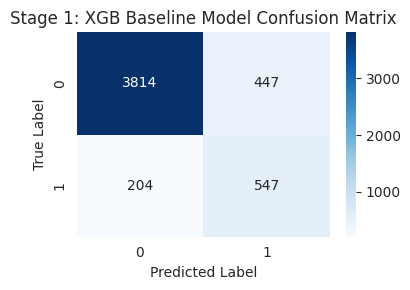

In [35]:
# print metrics and confusion matrix of model
threshold = 0.5
print_metrics(
    model_0_xgb_st1,
    'Stage 1: XGB Baseline Model',
    X_train_xgb_st1, X_val_xgb_st1, X_test_xgb_st1,
    y_train_st1, y_val_st1, y_test_st1,
    threshold=threshold
    )

**Observations:**  

* No significant degradation of performance in the validation/test sets suggests the model generalises well. i.e. no overfitting
* By adjusting the threshold to a lower value instead of the default 0.5, we can achieve a higher recall (meaning we predict most of the students likely to dropout, which is the key aim of this excercise), with the tradeoff being a lower precision (i.e. our likely-to-dropout set of students also include larger number of students who will actually complete the program, possible leading to a misallocation of resources). This is a trade-off to be managed considering the business implications.




#### Hyperparameter tuning

**Note:** Tried sklearn GridSearchCV which proved to be too resource/time intensive. Using RandomizedSearchCV instead with a considerable number of iterations and a deeper param grid

In [36]:
## hyperparameter tuning using sklearn RandomizedSearchCV

# initialize xgb model
xgb_model_st1 = XGBClassifier(
    tree_method="hist",
    random_state=random_seed,
    early_stopping_rounds=15,
    eval_metric="auc",
    verbosity = 1,
    device=device, #set previously
)

# considering the imbalanced data set, use scale_pos_weight parameter
  #to weight positive class
class_counts = y_train_st1.value_counts()
neg, pos = class_counts[0], class_counts[1]
estimated_weight = neg / pos

# hyper-parameter grid for tuning
param_grid = {
    "max_depth": [6, 8, 10, 12, 14],
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.03, 0.1, 0.3],
    "gamma": [0.1, 0.3, 0.5, 1.0],
    "scale_pos_weight": [
        1,
        estimated_weight,
        estimated_weight*0.5,
        ],
}
# initialize sklearn RandomSearchCV for hyperparameter tuning
xgb_grid_search_st1 = RandomizedSearchCV(
    xgb_model_st1,
    param_grid,
    n_iter=200,
    refit=True, # refit using best params found
    cv=3,
    random_state=random_seed,
    scoring="roc_auc",  #  "f1/roc_auc/recall etc"
    verbose=1,
    n_jobs=1,
)


**Observations:**


*  Setting 'scoring' metric of the tuner to 'recall' leads to much poorer precision. This is a trade-off that might not be ideal if the cost of trying to retain a student is high (i.e. we are needlessly allocating resources on students who are likely to complete the program anyway)
*  With 'scoring' set to f1 the results didn't improve.



In [37]:
# run tuning
xgb_grid_search_st1.fit(
    X_train_xgb_st1, y_train_st1,
    eval_set=[(X_val_xgb_st1, y_val_st1)],
    verbose=0,
    )


Streaming output truncated to the last 5000 lines.
[24]	validation_0-auc:0.86186
[25]	validation_0-auc:0.86142
[26]	validation_0-auc:0.86234
[27]	validation_0-auc:0.86223
[28]	validation_0-auc:0.86241
[29]	validation_0-auc:0.86275
[30]	validation_0-auc:0.86292
[31]	validation_0-auc:0.86310
[32]	validation_0-auc:0.86346
[33]	validation_0-auc:0.86385
[34]	validation_0-auc:0.86389
[35]	validation_0-auc:0.86393
[36]	validation_0-auc:0.86401
[37]	validation_0-auc:0.86384
[38]	validation_0-auc:0.86367
[39]	validation_0-auc:0.86351
[40]	validation_0-auc:0.86347
[41]	validation_0-auc:0.86320
[42]	validation_0-auc:0.86315
[43]	validation_0-auc:0.86314
[44]	validation_0-auc:0.86363
[45]	validation_0-auc:0.86363
[46]	validation_0-auc:0.86381
[47]	validation_0-auc:0.86374
[48]	validation_0-auc:0.86384
[49]	validation_0-auc:0.86371
[50]	validation_0-auc:0.86324
[0]	validation_0-auc:0.85144
[1]	validation_0-auc:0.85626
[2]	validation_0-auc:0.85517
[3]	validation_0-auc:0.86104
[4]	validation_0-auc:0.

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cpu',
                                           early_stopping_rounds=15,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=200, n_jobs=1,
                   param_distributions={'gamma': [0.1, 0.3, 0.5, 1.0],
                                        'learning_rate': [0.03, 0.1, 0.3],
                                        'max_depth': [6, 8, 10, 12, 14],
                                        'n_estimators': [100, 200, 300, 400],
                                        'scale_pos_weight': [1,
                                                             np.float64(5.676519567027477),
                                                             np.float64(2.8382597835137386)]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [47]:
# extract best model from grid search
model_tuned_xgb_st1 = xgb_grid_search_st1.best_estimator_
#model_tuned_xgb_st1.save_model(os.path.join(my_dir, 'model_tuned_xgb_st1.json'))

+-----------------------------------------------------------+
|                      XGB Tuned Model                      |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.908 |   0.893    | 0.893 |      -1.7%       |
| precision | 0.730 |   0.680    | 0.669 |      -8.3%       |
|   recall  | 0.612 |   0.544    | 0.561 |      -8.4%       |
|     f1    | 0.666 |   0.604    | 0.610 |      -8.4%       |
|    auc    | 0.919 |   0.872    | 0.884 |      -3.8%       |
+-----------+-------+------------+-------+------------------+


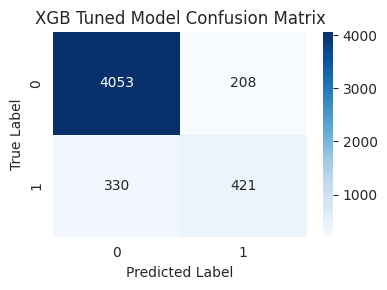

In [39]:
# inspect metrics across train-validation-test sets
threshold = 0.5
print_metrics(
    model_tuned_xgb_st1,
    'XGB Tuned Model',
    X_train_xgb_st1, X_val_xgb_st1, X_test_xgb_st1,
    y_train_st1, y_val_st1, y_test_st1,
    threshold=threshold
    )

#### Comparison of tuned vs untuned models

Threshold: 0.5
+-----------+----------------------+--------------------+
|   Metric  | Stage 1: Untuned XGB | Stage 1: Tuned XGB |
+-----------+----------------------+--------------------+
|  accuracy |        0.870         |       0.893        |
| precision |        0.550         |       0.669        |
|   recall  |        0.728         |       0.561        |
|     f1    |        0.627         |       0.610        |
|    auc    |        0.884         |       0.884        |
+-----------+----------------------+--------------------+


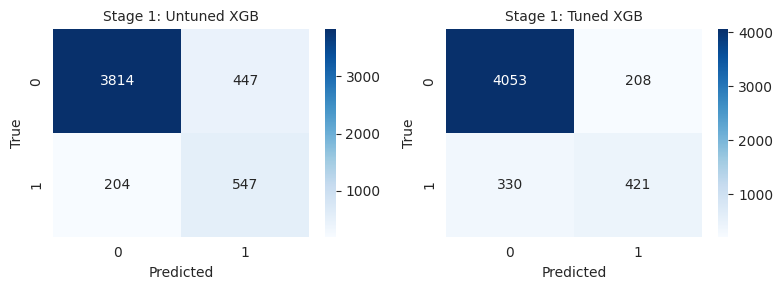

Threshold: 0.3
+-----------+----------------------+--------------------+
|   Metric  | Stage 1: Untuned XGB | Stage 1: Tuned XGB |
+-----------+----------------------+--------------------+
|  accuracy |        0.843         |       0.882        |
| precision |        0.485         |       0.587        |
|   recall  |        0.787         |       0.712        |
|     f1    |        0.600         |       0.644        |
|    auc    |        0.884         |       0.884        |
+-----------+----------------------+--------------------+


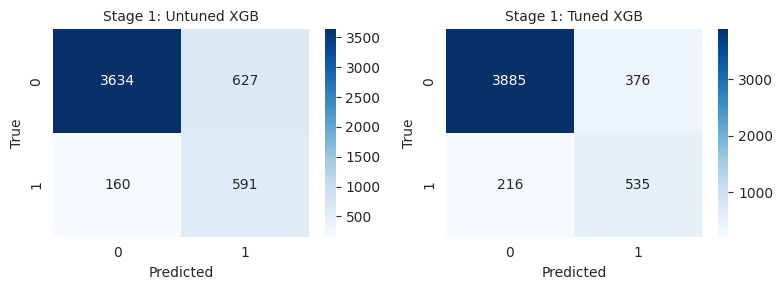

In [40]:
## compare metrics on the test set

# adjust threshold to manage the tradeoff between recall and precision
thresholds = [0.5,0.3]

for threshold in thresholds:
  print(f"Threshold: {threshold}")
  compare_models(
      models = [
          model_0_xgb_st1,
          model_tuned_xgb_st1
          ],
      X_test=X_test_xgb_st1,
      y_test=y_test_st1,
      model_names=[
          "Stage 1: Untuned XGB",
          "Stage 1: Tuned XGB",
      ],
      threshold=threshold
      )

**Comments:**


*   Model tuning has marginally improved the model on all metrics except recall
* Especially since precision is much higher we can to post-modelling adjustments with the threshold to increase recall keeping the false positives at a reasonable level. E.g. adjusting the threshold to 0.3 instead of the default 0.5. Here, the tuned model is a much better choice considering the TP - FP balance.



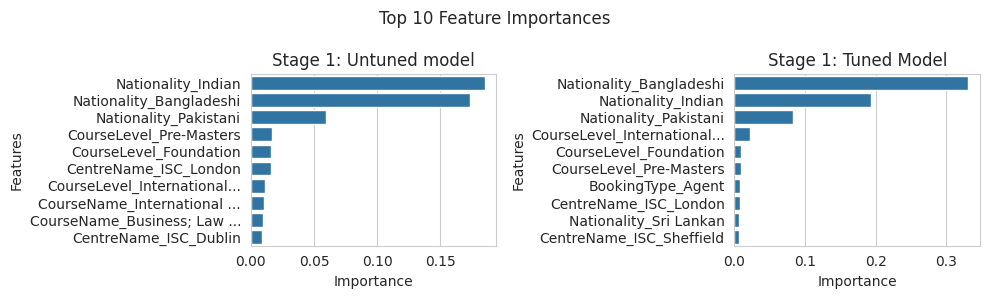

In [120]:
plot_feature_importance([model_0_xgb_st1, model_tuned_xgb_st1], ['Stage 1: Untuned model', 'Stage 1: Tuned Model'], X_test_xgb_st1, 10)

**Comments:**


*   Applicant nationality emerges as a strong predictor with the same top three features in both untuned and tuned models. The three nationality importance scores are highly dominant with much higher importance scores than the next set of features.
*   Course Level related features also in both case with 3 out of the 4 CourseLevel features in the top 10.



#### Retraining final model on larger dataset (training+validation)



The best model is trained on the larger set made of training+validation data to expose it to more data and increase the chances of better generalization

In [42]:
## retraining the baseline model

#get params from previous baseline model
params_model_0_xgb_st1 = model_0_xgb_st1.get_params()

# get best n_estimators from previous fit
best_n_estimators = model_0_xgb_st1.best_iteration + 1
params_model_0_xgb_st1['n_estimators'] = int(best_n_estimators*1.2) #slightly
  # higher to account for larger dataset
params_model_0_xgb_st1['early_stopping_rounds'] = None #no early stopping

# Initialize classifier
model_0_xgb_st1_retrained = XGBClassifier(**params_model_0_xgb_st1)
'''
model_0_xgb_st1_retrained = XGBClassifier(
    tree_method="hist",
    n_estimators=best_n_estimators,
    learning_rate=0.3,
    verbosity = 0,
    random_state=random_seed,
    scale_pos_weight=3,
    device = device
    )
'''

# Fit the model
model_0_xgb_st1_retrained.fit(
    X_full_xgb_st1, y_full_st1,
    verbose=0,
    )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=28, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
##retraining the tuned model

# best parameters
xgb_best_params_st1 = xgb_grid_search_st1.best_params_
xgb_best_params_st1['n_estimators'] = int(
    (model_tuned_xgb_st1.best_iteration + 1)*1.2)
xgb_best_params_st1['early_stopping_rounds'] = None

#fit on full train+val set
model_tuned_xgb_st1_retrained = XGBClassifier(**xgb_best_params_st1)
model_tuned_xgb_st1_retrained.fit(X_full_xgb_st1, y_full_st1 ,verbose=0)
#model_tuned_xgb_st1_retrained.save_model(os.path.join(my_dir, 'model_tuned_xgb_st1_retrained.json'))

Threshold: 0.5
+-----------+----------------------+--------------------+--------------------------------+------------------------------+
|   Metric  | Stage 1: Untuned XGB | Stage 1: Tuned XGB | Stage 1: Untuned XGB Retrained | Stage 1: Tuned XGB Retrained |
+-----------+----------------------+--------------------+--------------------------------+------------------------------+
|  accuracy |        0.870         |       0.893        |             0.871              |            0.895             |
| precision |        0.550         |       0.669        |             0.552              |            0.692             |
|   recall  |        0.728         |       0.561        |             0.739              |            0.538             |
|     f1    |        0.627         |       0.610        |             0.632              |            0.605             |
|    auc    |        0.884         |       0.884        |             0.888              |            0.887             |
+--------

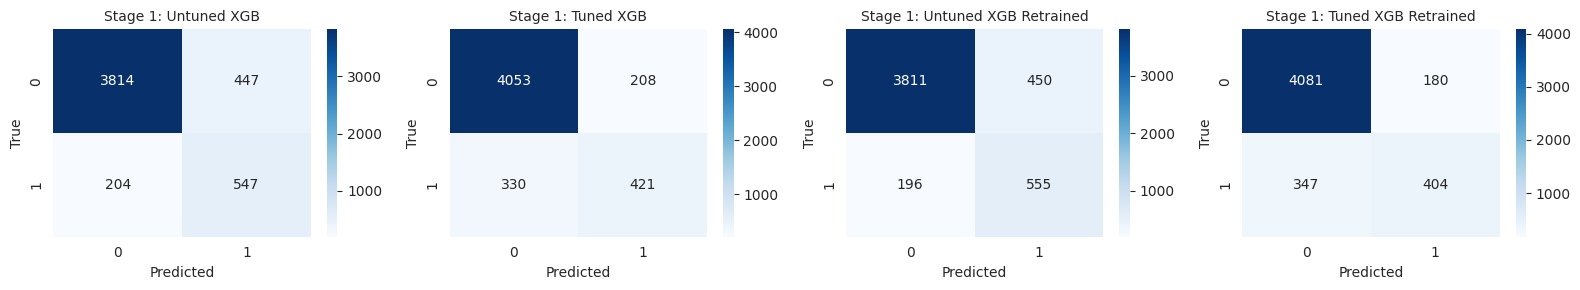

In [45]:
#compare the retrained models on the test set
thresholds= [0.5]
for threshold in thresholds:
  print(f"Threshold: {threshold}")
  compare_models(
      models = [
          model_0_xgb_st1,
          model_tuned_xgb_st1,
          model_0_xgb_st1_retrained,
          model_tuned_xgb_st1_retrained
          ],
      X_test=X_test_xgb_st1,
      y_test=y_test_st1,
      model_names=[
          "Stage 1: Untuned XGB",
          "Stage 1: Tuned XGB",
          "Stage 1: Untuned XGB Retrained",
          "Stage 1: Tuned XGB Retrained",
          ],
      threshold=threshold
      )

**Comments:**


*   Retraining didn't change the performance of the models meaningfully




##Modeling - Neural Network

#### Baseline Model

In [49]:
# define model layers
baseline_model_layers = [
    {'no_of_neurons': 64, 'activation': 'relu', 'kernel_regularization': None},
    {'no_of_neurons': 64, 'activation': 'relu', 'kernel_regularization': None},
]
# create model with dropout to reduce overfitting
model_0_nn_st1=create_model(
    input_dim=(X_train_nn_st1.shape[1],),
    model_layers=baseline_model_layers,
    optimizer=Adam(),
    dropout_rate=0.25
    )
#class weight to account for class imbalance
class_weight = {0: 1, 1: 3}

In [50]:
## fit model with early stopping

#set device to run on gpu if available
try:
    if tf.config.list_physical_devices('GPU'):
        device = '/GPU:0'
    else:
        device = '/CPU:0'
except Exception:
    device = '/CPU:0'

tf.random.set_seed(random_seed) #set for reproducability
with tf.device(device):
  #fit model with early stopping to reduce overfitting
  history_model_0_nn_st1 = model_0_nn_st1.fit(
      X_train_nn_st1, y_train_st1,
      epochs=50,
      batch_size=32,
      validation_data=(X_val_nn_st1, y_val_st1),
      verbose=0,
      class_weight=class_weight,
      callbacks=[
          EarlyStopping(
              monitor="val_loss",
              patience=5,
              restore_best_weights=True
          )
      ]
  )

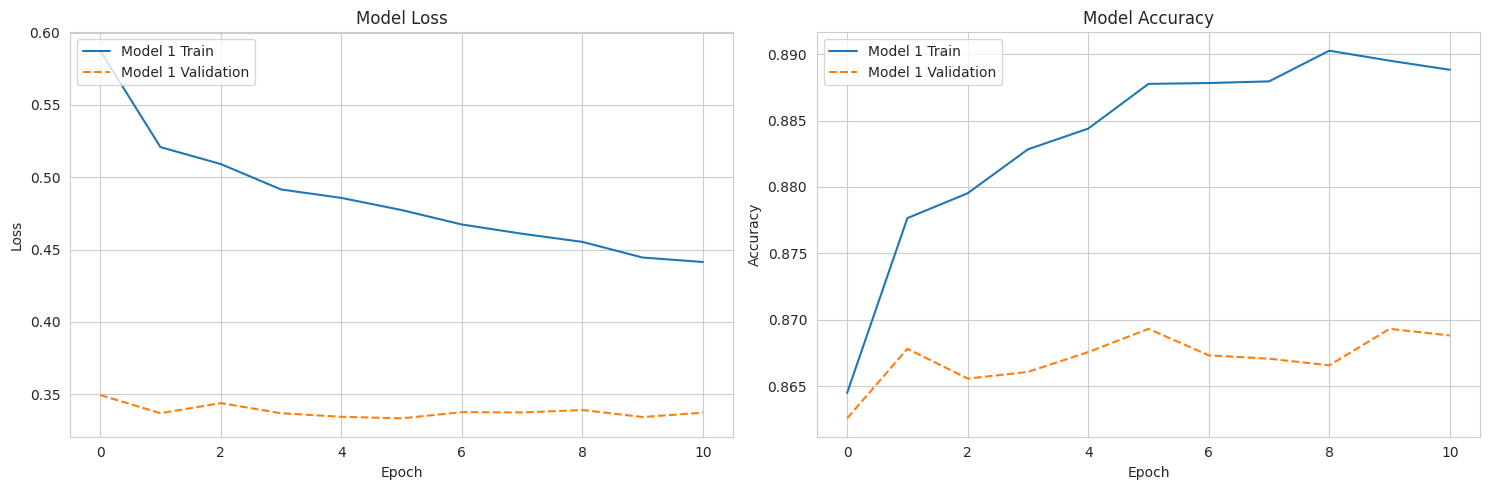

In [51]:
# plot loss curves
plot_histories([history_model_0_nn_st1])

**Comment:**
* With dropout active the validation loss is lower than the training loss indicating that the model is not overfitting. Early stopping has prevented validation loss from diverging.
* Accuracy is slightly lower in the validation set but stable.

In [52]:
def get_best_epoch_from_history(history):
  val_loss_per_epoch = history.history["val_loss"]
  best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
  print(f"Best epoch: {best_epoch}")
  print(f"Number of epochs run: {len(history.history['loss'])}")
  return best_epoch

In [53]:
#extract optimum epochs to retrain model later on full train+val dataset
baseline_epochs_nn_st1 = get_best_epoch_from_history(history_model_0_nn_st1)

Best epoch: 6
Number of epochs run: 11


+-----------------------------------------------------------+
|                      NN Untuned Model                     |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.888 |   0.869    | 0.871 |      -1.9%       |
| precision | 0.597 |   0.550    | 0.551 |      -7.6%       |
|   recall  | 0.779 |   0.707    | 0.742 |      -4.8%       |
|     f1    | 0.676 |   0.619    | 0.632 |      -6.4%       |
|    auc    | 0.916 |   0.871    | 0.882 |      -3.7%       |
+-----------+-------+------------+-------+------------------+


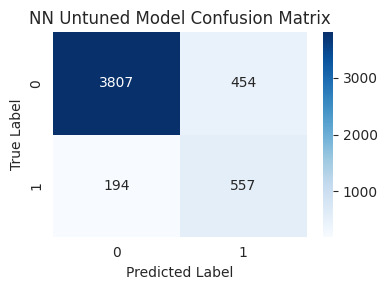

In [54]:
# compare training-val-test metrics
threshold = 0.5
print_metrics(
    model_0_nn_st1,
    'NN Untuned Model',
    X_train_nn_st1, X_val_nn_st1, X_test_nn_st1,
    y_train_st1, y_val_st1, y_test_st1,
    threshold=threshold
    )

**Comments:**
* Model generalizes quite well with only a marginal degradation of auc and accuracy, but a higher degradation in precision, recall & f1




#### Hyperparameter Tuning

Hyper-parameter tuning is done using the Keras RandomSearch tuner

In [55]:
# define hypermodel function to pass into tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_nn_st1.shape[1],)))

    ## Define hyperparameters
    # Number of hidden layers and neurons per layer
    num_layers = hp.Int("num_layers", min_value=1, max_value=4, step=1)

    for i in range(1, num_layers + 1):
        units = hp.Int(f"units_{i}", min_value=32, max_value=256, step=32)
        activation = hp.Choice(f"activation_{i}", values=["relu", "tanh"])
        model.add(Dense(
            units=units,
            activation=activation,
            kernel_initializer=GlorotUniform(seed=random_seed),
            ))

        if hp.Boolean(f"dropout_{i}"):
            model.add(Dropout(rate=0.25, seed=random_seed))

    model.add(Dense(1, activation="sigmoid"))
    # learning rate
    lr = hp.Choice('lr', values=[0.001, 0.003, 0.01])
    # optimizer choice
    optimizer_choice = hp.Choice("optimizer", values=["adam", "rmsprop"])

    #optimizer
    if optimizer_choice == "adam":
        optimizer = Adam(learning_rate=lr)
    else:
        optimizer = RMSprop(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            keras.metrics.F1Score(threshold=0.5),
            keras.metrics.Precision(),
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name='auc'),
        ],
    )
    return model

#function to model, history and optimum epoch for given hyper
def get_best_epoch(hp):
  model = build_model(hp)
  history = model.fit(
      X_train_nn_st1, y_train_st1,
      validation_data=(X_val_nn_st1, y_val_st1),
      epochs=100,
      batch_size=32,
      class_weight=class_weight,
      callbacks=[
          EarlyStopping(
              monitor="val_loss",
              patience=10,
              restore_best_weights=True,
          )
      ],
      verbose=0)
  val_loss_per_epoch = history.history["val_loss"]
  best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
  print(f"Best epoch: {best_epoch}")
  return model, history, best_epoch



Reloading Tuner from /content/drive/MyDrive/mini-project_6.3_course-02/tuner_nn_st1/tuner0.json


In [55]:
#initialize tuner
tuner = RandomSearch(
    hypermodel=build_model,
    objective="val_auc", #auc is more suitable given the imbalance in classes
    max_trials=50,
    seed=random_seed,
    executions_per_trial=2,
    #directory=my_dir,
    #project_name="tuner_nn_st1",
    overwrite=True, #set to False to load from file
)

class_weight = {0: 1, 1: 3} #account for class imbalance. Not including in
  # grid search to limit runtime

In [56]:
# grid search execution

try:
    if tf.config.list_physical_devices('GPU'):
        device = '/GPU:0'
    else:
        device = '/CPU:0'
except Exception:
    device = '/CPU:0'

with tf.device(device):
  tuner.search(
      X_train_nn_st1, y_train_st1,
      validation_data=(X_val_nn_st1, y_val_st1),
      class_weight=class_weight,
      epochs=50,
      verbose=1,
      callbacks=[
          EarlyStopping(
              monitor="val_loss",
              patience=5, #setting a low patience to limit runtime
              restore_best_weights=True
          )
      ]
  )


In [58]:
## refit best model to get history for loss - curves
best_hp_nn_st1 = tuner.get_best_hyperparameters(num_trials=1)[0]
#model = build_model(best_hp)

# get best model, history & optimum epoch
model_tuned_nn_st1, history, best_epoch_tuned_nn_st1 = get_best_epoch(best_hp_nn_st1)
print(f"Number of epochs run: {len(history.history['loss'])}")

Best epoch: 2
Number of epochs run: 12


+-----------------------------------------------------------+
|                       NN Tuned Model                      |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.874 |   0.864    | 0.860 |      -1.6%       |
| precision | 0.558 |   0.533    | 0.522 |      -6.4%       |
|   recall  | 0.763 |   0.727    | 0.754 |      -1.2%       |
|     f1    | 0.645 |   0.615    | 0.617 |      -4.3%       |
|    auc    | 0.894 |   0.872    | 0.879 |      -1.6%       |
+-----------+-------+------------+-------+------------------+


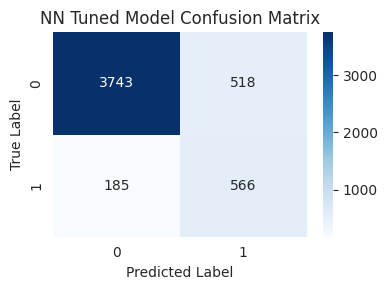

In [59]:
#print metrics
threshold = 0.5
print_metrics(
    model_tuned_nn_st1,
    'NN Tuned Model',
    X_train_nn_st1, X_val_nn_st1, X_test_nn_st1,
    y_train_st1, y_val_st1, y_test_st1,
    threshold=threshold
    )

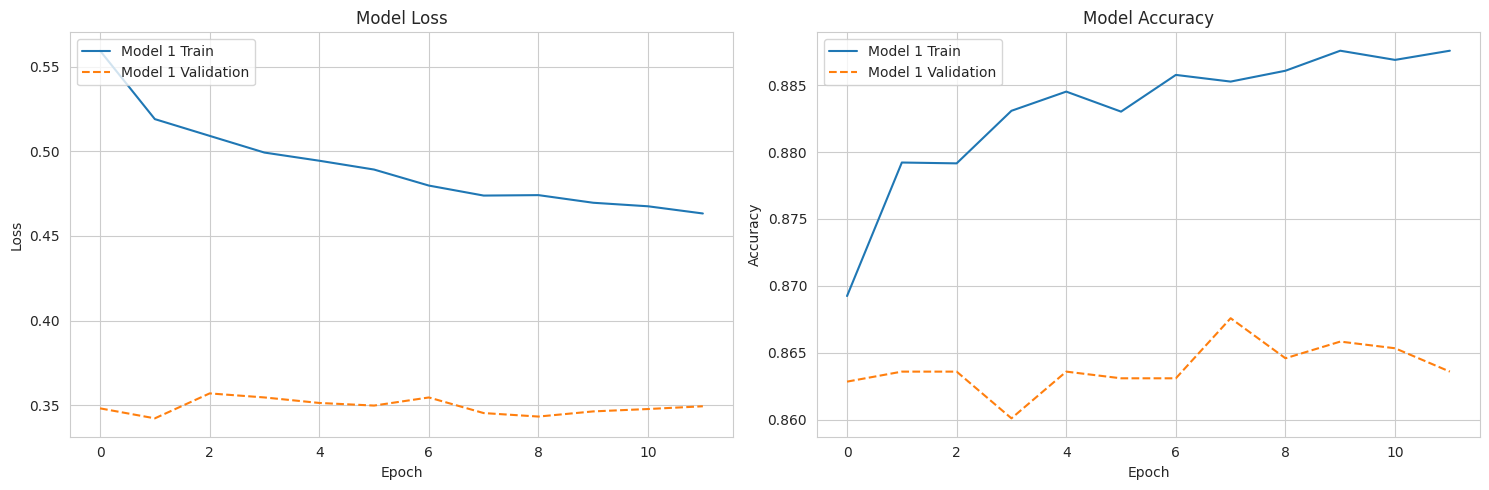

In [60]:
plot_histories([history])

**Comments:** After an initially low and stable validation loss, it begins to increase dramatatically. Possible improvements (given more time):


*   The top models of the tuner are very closely spaced to each other w.r.t evaluation metric 'auc'. Explore the loss curves of a number of top models to see whether a more stable loss curve can be found.
*   Class weight was fixed. Set it as a hyperparameter to be tuned within the fit method of the tuner.



#### Comparison of Tuned vs Untuned Models

+-----------+--------------------------+------------------------+
|   Metric  | Stage 1:NN Untuned Model | Stage 2:NN Tuned Model |
+-----------+--------------------------+------------------------+
|  accuracy |          0.871           |         0.860          |
| precision |          0.551           |         0.522          |
|   recall  |          0.742           |         0.754          |
|     f1    |          0.632           |         0.617          |
|    auc    |          0.882           |         0.879          |
+-----------+--------------------------+------------------------+


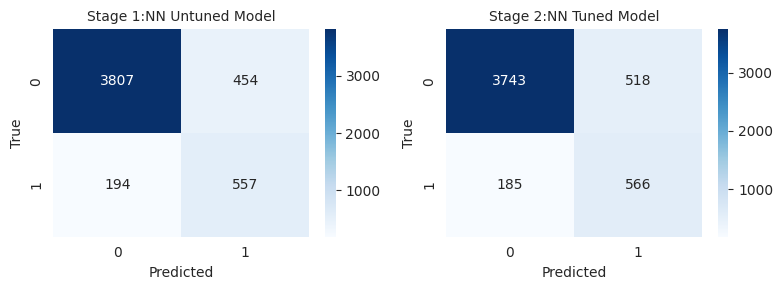

In [63]:
## compare tuned vs untuned models on the test set

# adjust threshold to manage the tradeoff between recall and precision
threshold = 0.5


compare_models(
    models = [
        model_0_nn_st1,
        model_tuned_nn_st1
        ],
    X_test=X_test_nn_st1,
    y_test=y_test_st1,
    model_names=[
        "Stage 1:NN Untuned Model",
        "Stage 2:NN Tuned Model",
    ],
    threshold=threshold
    )

**Comments:**


*   Tuning didn't have a significant impact on the metrics
*   Recall has improved slightly while the other metrics have marginally degraded (see possible improvements listed above)



### Training final model on larger dataset (training+validation)

In [64]:
## retrain baseline model on full dataset

# clone previous baseline
model_0_nn_st1_retrained = keras.models.clone_model(model_0_nn_st1)
model_0_nn_st1_retrained.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=[
        'accuracy',
        keras.metrics.F1Score(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
    ]
)

# Fit on the full training + validation set
model_0_nn_st1_retrained.fit(
    X_full_nn_st1, y_full_st1,
    epochs=int(baseline_epochs_nn_st1*1.2), #higher epoch count to account
                                          # for larger dataset
    class_weight=class_weight,
    batch_size=32,
    verbose=0,
)

In [65]:
## retrain tuned model

# define function to get model given hp and epoch
def get_retrained_model(hp, epoch):
  model = build_model(hp) # earlier defined function to build model
  history = model.fit(
              X_full_nn_st1, y_full_st1,
              batch_size=32,
              class_weight=class_weight,
              epochs=epoch,
              verbose=0)
  return model, history

In [66]:
#get retrained model
model_tuned_nn_st1_retrained, _ = get_retrained_model(
    best_hp_nn_st1,
    int(best_epoch_tuned_nn_st1*1.2) #higher epoch to account for larger dataset
    )

Threshold: 0.5
+-----------+--------------------------+------------------------+------------------------------------+----------------------------------+
|   Metric  | Stage 1:NN Untuned Model | Stage 1:NN Tuned Model | Stage 1:NN Untuned Model Retrained | Stage 1:NN Tuned Model Retrained |
+-----------+--------------------------+------------------------+------------------------------------+----------------------------------+
|  accuracy |          0.871           |         0.860          |               0.878                |              0.875               |
| precision |          0.551           |         0.522          |               0.576                |              0.568               |
|   recall  |          0.742           |         0.754          |               0.718                |              0.708               |
|     f1    |          0.632           |         0.617          |               0.639                |              0.630               |
|    auc    |      

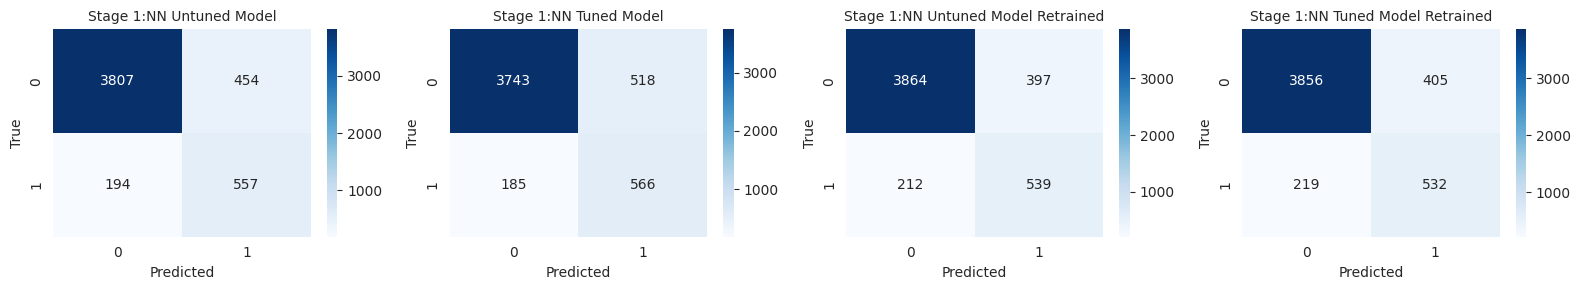

In [67]:
## compare the models on the test set
thresholds = [0.5]
for threshold in thresholds:
  print(f"Threshold: {threshold}")
  compare_models(
      models = [
          model_0_nn_st1,
          model_tuned_nn_st1,
          model_0_nn_st1_retrained,
          model_tuned_nn_st1_retrained],
      X_test=X_test_nn_st1,
      y_test=y_test_st1,
      model_names=[
          "Stage 1:NN Untuned Model",
          "Stage 1:NN Tuned Model",
          "Stage 1:NN Untuned Model Retrained",
          "Stage 1:NN Tuned Model Retrained",
          ],
      threshold=threshold
  )

# Stage 2 data

**Stage 2: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



## Load Data

In [68]:
# File URL
file_url_stage_2 = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"
data_stage_2_original = pd.read_csv(file_url_stage_2)
data_stage_2_original.head()

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen,NaN,NaN


In [69]:
data_stage_2_original.shape

(25059, 18)

## Data Preprocessing & preparation

In [70]:
# check whether stage 2 data is identical to stage 1 except of last 2 columns
data_stage_2_original.iloc[:,:-2].equals(data_stage_1_original)

True

**Note:** We can use the dataset from Stage 1 with the 2 new columns added.

In [71]:
# copy the preprocessed dataset from stage1, adding the 2 new columns
data_stage_2 = data_stage_1.copy()
data_stage_2['UnauthorisedAbsenceCount'] = data_stage_2_original['UnauthorisedAbsenceCount']
data_stage_2['AuthorisedAbsenceCount'] = data_stage_2_original['AuthorisedAbsenceCount']
data_stage_2.head()

,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,Target,ProgressionUniversity,Age,UnauthorisedAbsenceCount,AuthorisedAbsenceCount
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,0.0,University of Aberdeen,27,NaN,NaN
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,0.0,University of Aberdeen,26,5.0,93.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,0.0,University of Aberdeen,24,6.0,92.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,0.0,University of Aberdeen,26,15.0,67.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,0.0,University of Aberdeen,29,NaN,NaN


In [72]:
data_stage_2.shape

(25059, 13)

In [73]:
data_stage_2.dtypes

,0
CentreName,object
BookingType,object
LeadSource,object
Gender,object
Nationality,object
CourseLevel,object
CourseName,object
IsFirstIntake,bool
Target,float64
ProgressionUniversity,object


**Note:** Cardinality condition is already met since the added columns are numeric

### Missing values

In [74]:
# check missing value proportions for features & \n
# remove features with >50% missing
data_stage_2.isnull().sum()/data_stage_2.shape[0]*100


,0
CentreName,0.000000
BookingType,0.000000
LeadSource,0.000000
Gender,0.000000
Nationality,0.000000
CourseLevel,0.000000
CourseName,0.000000
IsFirstIntake,0.000000
Target,0.000000
ProgressionUniversity,0.000000


**Note:** There are missing values in 'AuthorisedAbsenceCount' and 'UnauthorisedAbsenceCount'. The null rows of these 2 columns can be removed since it is less than 2% of the data even if they don't overlap. However, will use the IterativeImputer to impute these values to keep the preprocessing steps cleaner and easier to replicate as well as to maintain same test set across all experiments

In [75]:
'''
# remove rows with null values in UnauthorisedAbsenceCount & AuthorisedAbsenceCount
data_stage_2 = data_stage_2.dropna(
    subset=['UnauthorisedAbsenceCount', 'AuthorisedAbsenceCount']
    )
'''

"\n# remove rows with null values in UnauthorisedAbsenceCount & AuthorisedAbsenceCount\ndata_stage_2 = data_stage_2.dropna(\n    subset=['UnauthorisedAbsenceCount', 'AuthorisedAbsenceCount']\n    )\n"

### Define X, y

In [76]:
#define input data X and target variable y
X_st2 = data_stage_2.drop('Target', axis=1).copy()
y_st2 = data_stage_2['Target'].copy()

In [77]:
X_st2.head()

,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,ProgressionUniversity,Age,UnauthorisedAbsenceCount,AuthorisedAbsenceCount
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,University of Aberdeen,27,NaN,NaN
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,University of Aberdeen,26,5.0,93.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,University of Aberdeen,24,6.0,92.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,University of Aberdeen,26,15.0,67.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,University of Aberdeen,29,NaN,NaN


In [78]:
X_st2.shape

(25059, 12)

### Split data

In [79]:
# split dataset into train-validation-test sets

X_temp_st2, X_test_st2, y_temp_st2, y_test_st2 = train_test_split(
    X_st2, y_st2,
    test_size=0.2,
    random_state=random_seed,
    stratify=y_st2)
X_train_st2, X_val_st2, y_train_st2, y_val_st2 = train_test_split(
    X_temp_st2, y_temp_st2,
    test_size=0.2,
    random_state=random_seed,
    stratify=y_temp_st2)

###  Feature Transformations

In [80]:
X_st2.dtypes

,0
CentreName,object
BookingType,object
LeadSource,object
Gender,object
Nationality,object
CourseLevel,object
CourseName,object
IsFirstIntake,bool
ProgressionUniversity,object
Age,int64


In [81]:
# Separate features into types
categorical_features_st2 = X_st2.select_dtypes(include=['object']).columns.tolist()
boolean_features_st2 = X_st2.select_dtypes(include=['bool']).columns.tolist()
numerical_features_st2 = X_st2.select_dtypes(include=['number']).columns.tolist()

# Use a temp encoder only to get all possible categories across full dataset (X_st2)
tmp_encoder = OneHotEncoder(
    handle_unknown='ignore', sparse_output=False, drop=None
    )
tmp_encoder.fit(X_st2[categorical_features_st2])
full_categories_st2 = tmp_encoder.categories_   # List of arrays for each categorical column
full_ohe_features_st2 = tmp_encoder.get_feature_names_out(categorical_features_st2)

#define common transformers
numeric_imputer = IterativeImputer(random_state=random_seed)

categorical_transformer_st2 = Pipeline([
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False,
        drop=None,
        categories=full_categories_st2  # force encoder to include all categories
    ))
])

bool_transformer = FunctionTransformer(lambda x: x.astype(int))

# numeric pipeline for NN - imput+scale
numeric_nn_transformer = Pipeline([
    ('imputer', numeric_imputer),
    ('scaler', StandardScaler())
])

# numeric pipeline for XGB - impute only
numeric_xgb_transformer = Pipeline([
    ('imputer', numeric_imputer)
])

# NN column transformer
preprocessor_nn = ColumnTransformer([
    ('num', numeric_nn_transformer, numerical_features_st2),
    ('cat', categorical_transformer_st2, categorical_features_st2),
    ('bool', bool_transformer, boolean_features_st2)
])

# XGB column transformer
preprocessor_xgb = ColumnTransformer([
    ('num', numeric_xgb_transformer, numerical_features_st2),
    ('cat', categorical_transformer_st2, categorical_features_st2),
    ('bool', bool_transformer, boolean_features_st2)
])

# fit-transform
X_train_nn_st2 = preprocessor_nn.fit_transform(X_train_st2)
X_val_nn_st2 = preprocessor_nn.transform(X_val_st2)
X_test_nn_st2 = preprocessor_nn.transform(X_test_st2)

X_train_xgb_st2 = preprocessor_xgb.fit_transform(X_train_st2)
X_val_xgb_st2 = preprocessor_xgb.transform(X_val_st2)
X_test_xgb_st2 = preprocessor_xgb.transform(X_test_st2)

# Use full_ohe_features from temp encoder to get correct feature names
feature_names_st2 = numerical_features_st2 + list(full_ohe_features_st2) + boolean_features_st2

# Convert to DataFrames
X_train_nn_st2 = pd.DataFrame(
    X_train_nn_st2, columns=feature_names_st2, index=X_train_st2.index
    )
X_val_nn_st2 = pd.DataFrame(
    X_val_nn_st2, columns=feature_names_st2, index=X_val_st2.index
    )
X_test_nn_st2 = pd.DataFrame(
    X_test_nn_st2, columns=feature_names_st2, index=X_test_st2.index
    )

X_train_xgb_st2 = pd.DataFrame(
    X_train_xgb_st2, columns=feature_names_st2, index=X_train_st2.index
    )
X_val_xgb_st2 = pd.DataFrame(
    X_val_xgb_st2, columns=feature_names_st2, index=X_val_st2.index
    )
X_test_xgb_st2 = pd.DataFrame(
    X_test_xgb_st2, columns=feature_names_st2, index=X_test_st2.index
    )

#  Merge train + val sets for final model retraining
X_full_nn_st2 = pd.concat([X_train_nn_st2, X_val_nn_st2], axis=0)
X_full_xgb_st2 = pd.concat([X_train_xgb_st2, X_val_xgb_st2], axis=0)
y_full_st2 = pd.concat([y_train_st2, y_val_st2], axis=0)

In [82]:
X_train_nn_st2.isnull().sum().sort_values(ascending=False)

,0
IsFirstIntake,0
ProgressionUniversity_Outside of partnership,0
ProgressionUniversity_Liverpool John Moores University,0
ProgressionUniversity_Leeds Beckett University,0
ProgressionUniversity_Lancaster University,0
...,...
CentreName_ISC_Dublin,0
CentreName_ISC_Cardiff,0
CentreName_ISC_Aberdeen,0
AuthorisedAbsenceCount,0


In [83]:
X_train_nn_st2.shape

(16037, 401)

## Baseline Models

#### XGBoost

Fit baseline model with same configuration as Stage 1

In [84]:
# Set training device to use gpu if available
try:
  if len(tf.config.list_physical_devices('GPU'))>0:
    device = 'gpu'
  else:
    device = 'cpu'
except ValueError:
  device = 'cpu'

# Initialize classifier with default settings & early stopping enabled.
model_0_xgb_st2 = XGBClassifier(
    tree_method="hist",
    n_estimators=100,
    learning_rate=0.3,
    eval_metric="auc",
    verbosity = 0,
    scale_pos_weight=3, #moderate weighting for positive class due to imbalance
    early_stopping_rounds=10,
    random_state=random_seed,
    device = device,
    )

# Fit the model, val sets are used for early stopping.
model_0_xgb_st2.fit(
    X_train_xgb_st2, y_train_st2,
    eval_set=[(X_val_xgb_st2, y_val_st2)],
    verbose=0,
    )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

This model will be retrained on the larger dataset of (train+val) for better generalization

In [85]:
## retraining the baseline model on train+val set

# get best n_estimators from previous fit
best_n_estimators_st2 = model_0_xgb_st2.best_iteration + 1

# initialize model with same params
model_0_xgb_st2_params = model_0_xgb_st2.get_params()
model_0_xgb_st2_params['n_estimators'] = best_n_estimators_st2
model_0_xgb_st2_params['early_stopping_rounds'] = None


# Initialize model
model_0_xgb_st2_retrained = XGBClassifier(**model_0_xgb_st2_params)

# Fit the model
model_0_xgb_st2_retrained.fit(
    X_full_xgb_st2, y_full_st2,
    verbose=0,
    )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=45, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

+-----------------------------------------------------------+
|            Stage 2: XGB Untuned Model Retrained           |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.917 |   0.914    | 0.891 |      -2.8%       |
| precision | 0.686 |   0.680    | 0.612 |      -10.8%      |
|   recall  | 0.819 |   0.807    | 0.746 |      -8.9%       |
|     f1    | 0.747 |   0.738    | 0.672 |      -10.0%      |
|    auc    | 0.955 |   0.954    | 0.918 |      -3.8%       |
+-----------+-------+------------+-------+------------------+


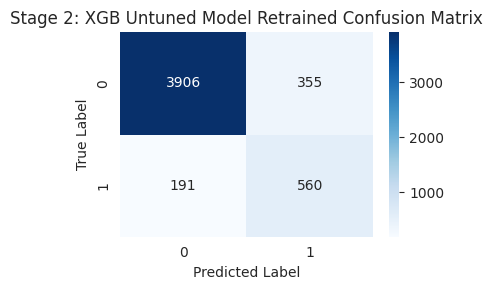

In [86]:
threshold = 0.5
print_metrics(
    model_0_xgb_st2_retrained,
    'Stage 2: XGB Untuned Model Retrained',
    X_train_xgb_st2, X_val_xgb_st2, X_test_xgb_st2,
    y_train_st2, y_val_st2, y_test_st2,
    threshold=threshold
    )

#### NN

Fit baseline neural network with same configuration as Stage 1

In [87]:
# define arbitrary layers
baseline_model_layers = [
    {'no_of_neurons': 8, 'activation': 'relu', 'kernel_regularization': None},
    {'no_of_neurons': 64, 'activation': 'relu', 'kernel_regularization': None},
]
#class weight
class_weight = {0: 1, 1: 3}

# create model using predefined function with dropout to reduce overfitting
model_0_nn_st2=create_model(
    input_dim=(X_train_nn_st2.shape[1],),
    model_layers=baseline_model_layers,
    optimizer=Adam(),
    dropout_rate=0.25
    )

In [88]:
# fit model with early stopping
try:
    if tf.config.list_physical_devices('GPU'):
        device = '/GPU:0'
    else:
        device = '/CPU:0'
except Exception:
    device = '/CPU:0'

tf.random.set_seed(random_seed) #set for reproducability
with tf.device(device):
  history_model_0_nn_st2 = model_0_nn_st2.fit(
      X_train_nn_st2, y_train_st2,
      epochs=50,
      batch_size=32,
      validation_data=(X_val_nn_st2, y_val_st2),
      verbose=0,
      class_weight=class_weight,
      callbacks=[
          EarlyStopping(
              monitor="val_loss",
              patience=5,
              restore_best_weights=True
          )
      ]
  )

In [89]:
#extract optimum epochs to retrain model later on full train+val dataset
baseline_epochs_nn_st2 = get_best_epoch_from_history(history_model_0_nn_st2)

Best epoch: 13
Number of epochs run: 18


In [90]:
## retrain baseline model on full train+val dataset

# clone previous baseline
model_0_nn_st2_retrained = keras.models.clone_model(model_0_nn_st2)
model_0_nn_st2_retrained.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=[
        'accuracy',
        keras.metrics.F1Score(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
    ]
)

# Fit on the full training + validation set
model_0_nn_st2_retrained.fit(
    X_full_nn_st2, y_full_st2,
    epochs=int(baseline_epochs_nn_st2*1.2), #higher epoch count to account
                                          # for larger dataset
    class_weight=class_weight,
    batch_size=32,
    verbose=0,
)

'\n# initialize on same layers and params\nmodel_0_nn_st2_retrained = create_model(\n    input_dim=(X_full_nn_st2.shape[1],),\n    model_layers=baseline_model_layers,\n    optimizer=Adam(),\n    dropout_rate=0.25\n)\n\n# Fit model\nmodel_0_nn_st2_retrained.fit(\n    X_full_nn_st2, y_full_st2,\n    epochs=int(baseline_epochs_nn_st2*1.2), #higher epoch count to account\n                                          # for larger dataset\n    class_weight=class_weight,\n    batch_size=32,\n    verbose=1\n)\n'

+-----------------------------------------------------------+
|            Stage 2: NN Untuned Model Retrained            |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.896 |   0.890    | 0.882 |      -1.6%       |
| precision | 0.614 |   0.598    | 0.579 |      -5.7%       |
|   recall  | 0.825 |   0.807    | 0.783 |      -5.1%       |
|     f1    | 0.704 |   0.687    | 0.666 |      -5.5%       |
|    auc    | 0.929 |   0.927    | 0.907 |      -2.3%       |
+-----------+-------+------------+-------+------------------+


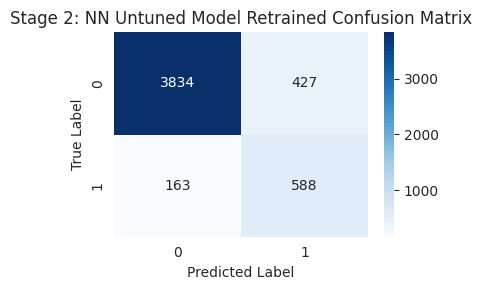

In [186]:
print_metrics(
    model_0_nn_st2_retrained,
    'Stage 2: NN Untuned Model Retrained',
    X_train_nn_st2, X_val_nn_st2, X_test_nn_st2,
    y_train_st2, y_val_st2, y_test_st2,
    threshold=threshold
    )

#### Stage 2 vs Stage 1

+----------------------------------------------------------------+
|   Test Set Metric Comparison Across Stages (Threshold: 0.5)    |
+-----------+-------------+-------------+------------+-----------+
|   Metric  | Stage 1:XGB | Stage 2:XGB | Stage 1:NN | Stage2:NN |
+-----------+-------------+-------------+------------+-----------+
|  accuracy |    0.871    |    0.891    |   0.878    |   0.882   |
| precision |    0.552    |    0.612    |   0.576    |   0.579   |
|   recall  |    0.739    |    0.746    |   0.718    |   0.783   |
|     f1    |    0.632    |    0.672    |   0.639    |   0.666   |
|    auc    |    0.888    |    0.918    |   0.880    |   0.907   |
+-----------+-------------+-------------+------------+-----------+


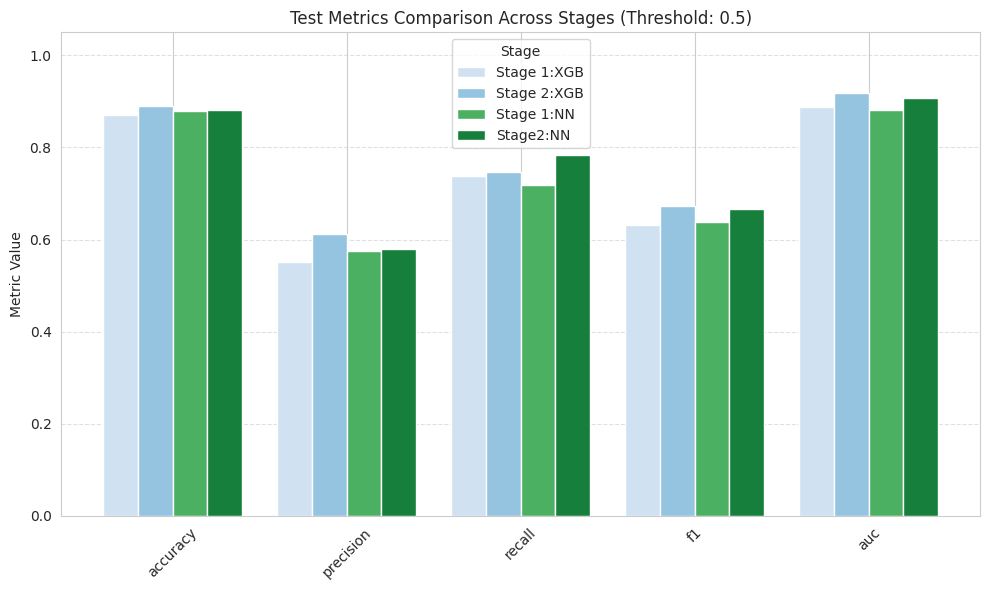

In [170]:
# compare untuned baseline models (all retrained on train+val set) on the test set
threshold = 0.5
compare_stages_on_test(
    stage_labels=["Stage 1:XGB", "Stage 2:XGB", "Stage 1:NN", "Stage2:NN"],
    stage_models=[
        model_0_xgb_st1_retrained, model_0_xgb_st2_retrained,
        model_0_nn_st1_retrained, model_0_nn_st2_retrained],
    stage_data=[
        (X_test_xgb_st1, y_test_st1),
        (X_test_xgb_st2, y_test_st2),
        (X_test_nn_st1, y_test_st1),
        (X_test_nn_st2, y_test_st2)
    ],
    threshold=threshold
)


**Comments:**
*  The new features added in Stage 2 (related to course engagement) have contributed to only marginal albeit positive improvements across all metrics for both types of models.
* We see a slightly more pronounced improvement in precision for the XGB model and in recall for the NN model.
* However, in practical terms

## Hyperparameter Tuning

#### XGBoost

In [93]:
## hyperparameter tuning using sklearn RandomizedSearchCV

# initialize xgb model
xgb_model_st2 = XGBClassifier(
    tree_method="hist",
    random_state=random_seed,
    early_stopping_rounds=15,
    eval_metric="auc",
    verbosity = 1,
    #device=device, #set previously
)

# considering the imbalanced data set, use scale_pos_weight parameter
  #to weight positive class
class_counts = y_train_st2.value_counts()
neg, pos = class_counts[0], class_counts[1]
estimated_weight = neg / pos

# set paramters for tuning
param_grid = {
    "max_depth": [6, 8, 10, 12],
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [ 0.1, 0.3, 0.5],
    "gamma": [0, 0.1, 0.3, 0.5],
    "scale_pos_weight": [
        1,
        estimated_weight,
        estimated_weight*0.25,
        estimated_weight*0.5,
        ],
}

# initialize sklearn RandomSearchCV for hyperparameter tuning
xgb_grid_search_st2 = RandomizedSearchCV(
    xgb_model_st2,
    param_grid,
    n_iter=200,
    cv=3,
    random_state=random_seed,
    scoring="roc_auc",  #  "f1/roc_auc/recall etc"
    verbose=1,
    n_jobs=1, #-1 to use maximum threads
)



In [103]:
# run tuning
xgb_grid_search_st2.fit(
    X_train_xgb_st2, y_train_st2,
    eval_set=[(X_val_xgb_st2, y_val_st2)],
    verbose=0,
    )

# extract best model from grid search
model_tuned_xgb_st2 = xgb_grid_search_st2.best_estimator_
#model_tuned_xgb_st2.save_model(os.path.join(my_dir, 'model_tuned_xgb_st2.json'))

In [104]:
##retraining the tuned model

# best parameters
xgb_best_params_st2 = xgb_grid_search_st2.best_params_
xgb_best_params_st2['n_estimators'] = int(
    (model_tuned_xgb_st2.best_iteration + 1)*1.2)
xgb_best_params_st2['early_stopping_rounds'] = None

#fit on full train+val set
model_tuned_xgb_st2_retrained = XGBClassifier(**xgb_best_params_st2)
model_tuned_xgb_st2_retrained.fit(X_full_xgb_st2, y_full_st2 ,verbose=0)
#model_tuned_xgb_st2_retrained.save_model(os.path.join(my_dir, 'model_tuned_xgb_st2_retrained.json'))

+-----------------------------------------------------------+
|                 XGB Tuned Model Retrained                 |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.926 |   0.922    | 0.905 |      -2.2%       |
| precision | 0.806 |   0.795    | 0.720 |      -10.7%      |
|   recall  | 0.668 |   0.646    | 0.603 |      -9.7%       |
|     f1    | 0.731 |   0.713    | 0.657 |      -10.2%      |
|    auc    | 0.947 |   0.943    | 0.922 |      -2.7%       |
+-----------+-------+------------+-------+------------------+


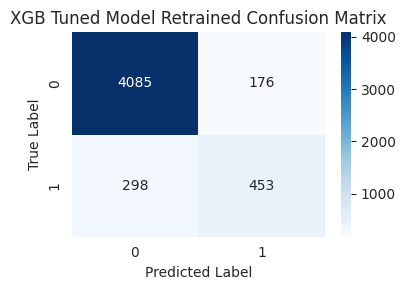

In [188]:
#print metrics
threshold = 0.5
print_metrics(
    model_tuned_xgb_st2_retrained,
    'XGB Tuned Model Retrained',
    X_train_xgb_st2, X_val_xgb_st2, X_test_xgb_st2,
    y_train_st2, y_val_st2, y_test_st2,
    threshold=threshold
    )

**Comparison of tuned vs untuned models**

Threshold: 0.5
+-----------+-------------------+-----------------+
|   Metric  | Untuned Retrained | Tuned Retrained |
+-----------+-------------------+-----------------+
|  accuracy |       0.891       |      0.905      |
| precision |       0.612       |      0.720      |
|   recall  |       0.746       |      0.603      |
|     f1    |       0.672       |      0.657      |
|    auc    |       0.918       |      0.922      |
+-----------+-------------------+-----------------+


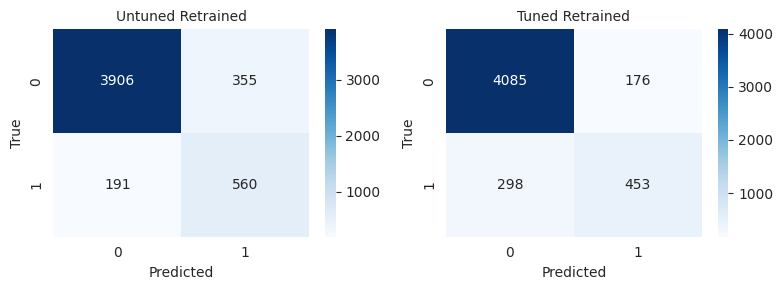

Threshold: 0.3
+-----------+-------------------+-----------------+
|   Metric  | Untuned Retrained | Tuned Retrained |
+-----------+-------------------+-----------------+
|  accuracy |       0.860       |      0.897      |
| precision |       0.520       |      0.635      |
|   recall  |       0.835       |      0.730      |
|     f1    |       0.641       |      0.679      |
|    auc    |       0.918       |      0.922      |
+-----------+-------------------+-----------------+


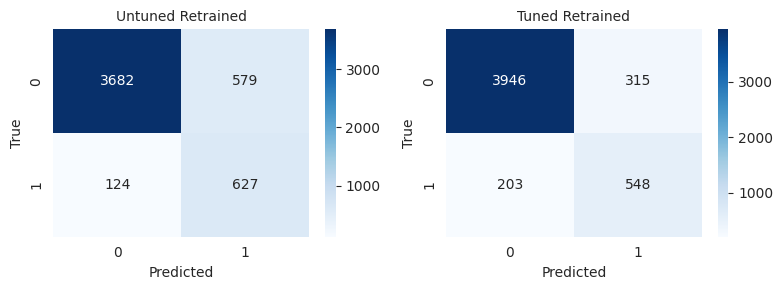

In [190]:
thresholds= [0.5, 0.3]
for threshold in thresholds:
  print(f"Threshold: {threshold}")
  compare_models(
      models = [
          model_0_xgb_st2_retrained, model_tuned_xgb_st2_retrained
      ],
      X_test = X_test_xgb_st2,
      y_test = y_test_st2,
      model_names = ["Untuned Retrained", "Tuned Retrained"],
      threshold=threshold
  )

**Comments:**
* The improvement due to tuning is very minimal in terms of auc and accuracy.
* However, we see a meaningful increase in precision and decrease in recall.
* We could adjust the threshold to manage the tradeoff between precision and recall which would depend on what is desired from a business perspective.

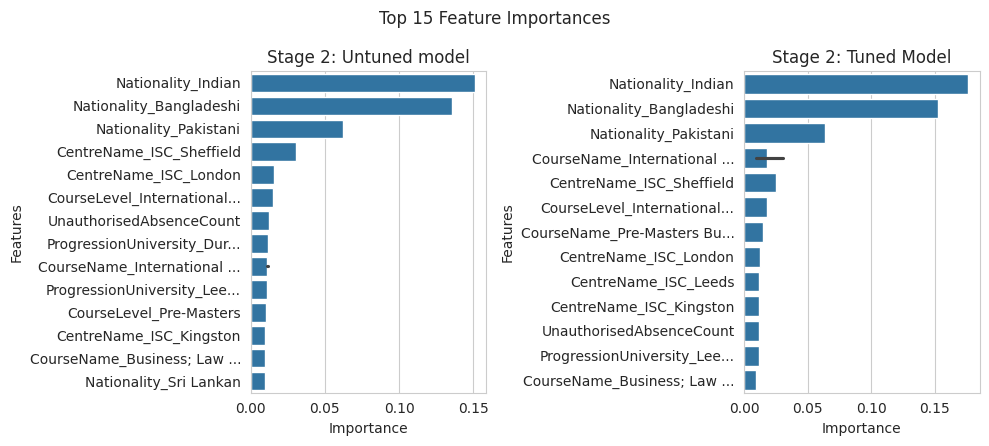

In [191]:
#plot feature importance
plot_feature_importance(
    [model_0_xgb_st2_retrained, model_tuned_xgb_st2_retrained],
    ['Stage 2: Untuned model', 'Stage 2: Tuned Model'],
    X_test_xgb_st2, 15)

**Comment:**

* There is no difference in the top 3 most important factors
* One of the new features features appears in the top 15 indicating it might be a useful factor to monitor mid-stage



#### NN

Hyper-parameter tuning is done using the Keras RandomSearch tuner

In [106]:
# define hypermodel function to pass into tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_nn_st2.shape[1],)))

    ## Define hyperparameters
    # Number of hidden layers and neurons per layer
    num_layers = hp.Int("num_layers", min_value=1, max_value=4, step=1)

    for i in range(1, num_layers + 1):
        units = hp.Int(f"units_{i}", min_value=32, max_value=256, step=32)
        activation = hp.Choice(f"activation_{i}", values=["relu", "tanh"])
        model.add(Dense(
            units=units,
            activation=activation,
            kernel_initializer=GlorotUniform(seed=random_seed)
            ))

        if hp.Boolean(f"dropout_{i}"):
            model.add(Dropout(rate=0.25, seed=random_seed))

    model.add(Dense(1, activation="sigmoid"))

    # learning rate
    lr = hp.Choice('lr', values=[0.001, 0.003, 0.01])
    optimizer_choice = hp.Choice("optimizer", values=["adam", "rmsprop"])

    #optimizer
    if optimizer_choice == "adam":
        optimizer = Adam(learning_rate=lr)
    else:
        optimizer = RMSprop(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            keras.metrics.F1Score(threshold=0.5),
            keras.metrics.Precision(),
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name='auc'),
        ],
    )
    return model

#initialize tuner
tuner_nn_st2 = RandomSearch(
    hypermodel=build_model,
    objective="val_auc", #auc is more suitable given the imbalance in classes
    max_trials=50,
    seed=random_seed,
    executions_per_trial=2,
    #directory=my_dir,
    #project_name="tuner_nn_st2",
    overwrite=True,
)

class_weight = {0: 1, 1: 3}

In [107]:
# grid search execution

try:
    if tf.config.list_physical_devices('GPU'):
        device = '/GPU:0'
    else:
        device = '/CPU:0'
except Exception:
    device = '/CPU:0'

with tf.device(device):
  tuner_nn_st2.search(
      X_train_nn_st2, y_train_st2,
      validation_data=(X_val_nn_st2, y_val_st2),
      class_weight=class_weight,
      epochs=50,
      verbose=0,
      callbacks=[
          EarlyStopping(
              monitor="val_loss",
              patience=5,
              restore_best_weights=True
          )
      ]
  )

In [108]:
## refit best model to get history for loss - curves
best_hp_nn_st2 = tuner_nn_st2.get_best_hyperparameters(num_trials=1)[0]
#model = build_model(best_hp)
def get_best_epoch(hp):
  model = build_model(hp)
  history = model.fit(
      X_train_nn_st2, y_train_st2,
      validation_data=(X_val_nn_st2, y_val_st2),
      epochs=100,
      batch_size=32,
      class_weight=class_weight,
      callbacks=[
          EarlyStopping(
              monitor="val_loss",
              patience=10,
              restore_best_weights=True,
          )
      ],
      verbose=0)
  val_loss_per_epoch = history.history["val_loss"]
  best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
  print(f"Best epoch: {best_epoch}")
  return model, history, best_epoch

_, _, best_epoch_tuned_nn_st2 = get_best_epoch(best_hp_nn_st2)
print(f"Number of epochs run: {len(history.history['loss'])}")

Best epoch: 3
Number of epochs run: 12


In [109]:
## retrain tuned model on larger dataset of (train+val)

# define function to get model given hp and epoch
def get_retrained_model(hp, epoch):
  model = build_model(hp) # earlier defined function to build model
  history = model.fit(
              X_full_nn_st2, y_full_st2,
              batch_size=32,
              class_weight=class_weight,
              epochs=epoch,
              verbose=0)
  return model, history

model_tuned_nn_st2_retrained, _ = get_retrained_model(
    best_hp_nn_st2,
    int(best_epoch_tuned_nn_st2*1.2))

**Comparison of tuned vs untuned models**

Threshold: 0.5
+-----------+-------------------+-----------------+
|   Metric  | Untuned Retrained | Tuned Retrained |
+-----------+-------------------+-----------------+
|  accuracy |       0.882       |      0.887      |
| precision |       0.579       |      0.595      |
|   recall  |       0.783       |      0.767      |
|     f1    |       0.666       |      0.670      |
|    auc    |       0.907       |      0.907      |
+-----------+-------------------+-----------------+


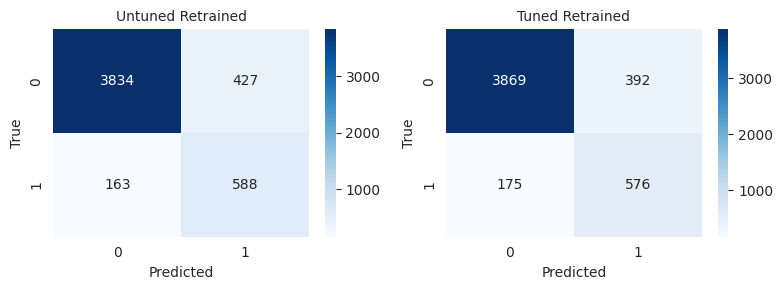

In [111]:
## compare the models on the test set
thresholds = [0.5]
for threshold in thresholds:
  print(f"Threshold: {threshold}")
  compare_models(
      models = [
          model_0_nn_st2_retrained, model_tuned_nn_st2_retrained
          ],
      X_test = X_test_nn_st2,
      y_test = y_test_st2,
      model_names = ["Untuned Retrained", "Tuned Retrained"],
      threshold=threshold
  )

**Comments:**
* The impact of tuning is almost negligible with a marginally higher precision and a lower recall
* This pattern was observed with the XGB model as well

#### Stage 2 vs Stage 1

+----------------------------------------------------------------+
|   Test Set Metric Comparison Across Stages (Threshold: 0.5)    |
+-----------+-------------+-------------+------------+-----------+
|   Metric  | Stage 1:XGB | Stage 2:XGB | Stage 1:NN | Stage2:NN |
+-----------+-------------+-------------+------------+-----------+
|  accuracy |    0.895    |    0.905    |   0.875    |   0.887   |
| precision |    0.692    |    0.720    |   0.568    |   0.595   |
|   recall  |    0.538    |    0.603    |   0.708    |   0.767   |
|     f1    |    0.605    |    0.657    |   0.630    |   0.670   |
|    auc    |    0.887    |    0.922    |   0.880    |   0.907   |
+-----------+-------------+-------------+------------+-----------+


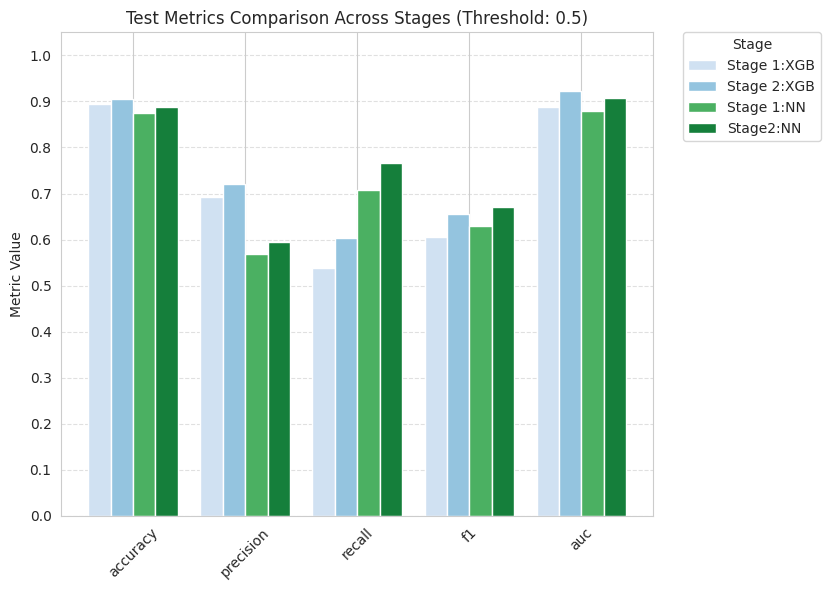

In [182]:
#compare tuned models
compare_stages_on_test(
    stage_labels=[
        "Stage 1:XGB", "Stage 2:XGB",
        "Stage 1:NN", "Stage2:NN"
        ],
    stage_models=[
        model_tuned_xgb_st1_retrained, model_tuned_xgb_st2_retrained,
        model_tuned_nn_st1_retrained, model_tuned_nn_st2_retrained
    ],
    stage_data=[
        (X_test_xgb_st1, y_test_st1),
        (X_test_xgb_st2, y_test_st2),
        (X_test_nn_st1, y_test_st1),
        (X_test_nn_st2, y_test_st2)
    ],
    threshold=threshold
)

**Comments:**
* As with the baseline models, the tuned models all show a positive improvement from Stage 1 to Stage 2.
* Except for recall which shows a meaningful improvement the change in other metrics is very small

# Stage 3 data

## Load Data

In [127]:
# File URL
file_url_stage_3 = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"
data_stage_3_original = pd.read_csv(file_url_stage_3)
data_stage_3_original.head()

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,...,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,...,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,...,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,...,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,MSc International Business Management,University of Aberdeen,NaN,NaN


In [128]:
data_stage_3_original.shape

(25059, 21)

## Data Preprocessing & preparation

**Stage 3: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.






In [129]:
## check whether stage 3 data is identical to stage 2 except new added columnns

# new columns
new_st3_columns = data_stage_3_original.columns.difference(data_stage_2_original.columns)
#new_st3_columns

# compare stage 2 & stage3 data for common columns
data_stage_3_original[data_stage_2_original.columns].equals(data_stage_2_original)

True

**Note:** We can use the dataset from Stage 2 with the new columns added

In [130]:
data_stage_2.shape

(25059, 13)

In [131]:
# copy the preprocessed dataset from stage1, adding the 2 new columns
data_stage_3 = data_stage_2.copy()
data_stage_3[new_st3_columns] = data_stage_3_original[new_st3_columns]
data_stage_3.head()

,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,Target,ProgressionUniversity,Age,UnauthorisedAbsenceCount,AuthorisedAbsenceCount,AssessedModules,FailedModules,PassedModules
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,0.0,University of Aberdeen,27,NaN,NaN,4.0,0.0,4.0
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,0.0,University of Aberdeen,26,5.0,93.0,7.0,0.0,7.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,0.0,University of Aberdeen,24,6.0,92.0,8.0,0.0,8.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,0.0,University of Aberdeen,26,15.0,67.0,8.0,0.0,8.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,0.0,University of Aberdeen,29,NaN,NaN,4.0,0.0,4.0


In [133]:
data_stage_3.dtypes

,0
CentreName,object
BookingType,object
LeadSource,object
Gender,object
Nationality,object
CourseLevel,object
CourseName,object
IsFirstIntake,bool
Target,float64
ProgressionUniversity,object


**Note:** Cardinality condition is already met since the added columns are numeric

### Missing values

In [136]:
# check missing value proportions for features & \n
# remove features with >50% missing
data_stage_3.isnull().sum()/data_stage_3.shape[0]*100


,0
CentreName,0.000000
BookingType,0.000000
LeadSource,0.000000
Gender,0.000000
Nationality,0.000000
CourseLevel,0.000000
CourseName,0.000000
IsFirstIntake,0.000000
Target,0.000000
ProgressionUniversity,0.000000


**Note:** There are missing values in 3 columns. The corresponding samples cannot be removed since it is 8% of the data and therefore have to be imputed. Imputing will be done after the train-validation-test split



### Define X, y

In [137]:
#define input data X and target variable y
X_st3 = data_stage_3.drop('Target', axis=1).copy()
y_st3 = data_stage_3['Target'].copy()

In [138]:
X_st3.head()

,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,ProgressionUniversity,Age,UnauthorisedAbsenceCount,AuthorisedAbsenceCount,AssessedModules,FailedModules,PassedModules
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,University of Aberdeen,27,NaN,NaN,4.0,0.0,4.0
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,University of Aberdeen,26,5.0,93.0,7.0,0.0,7.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,University of Aberdeen,24,6.0,92.0,8.0,0.0,8.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,University of Aberdeen,26,15.0,67.0,8.0,0.0,8.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,University of Aberdeen,29,NaN,NaN,4.0,0.0,4.0


In [139]:
X_st3.shape

(25059, 15)

In [154]:
X_st3.columns

Index(['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality',
       'CourseLevel', 'CourseName', 'IsFirstIntake', 'ProgressionUniversity',
       'Age', 'UnauthorisedAbsenceCount', 'AuthorisedAbsenceCount',
       'AssessedModules', 'FailedModules', 'PassedModules'],
      dtype='object')

### Split data

In [140]:
# split dataset into train-validation-test sets
X_temp_st3, X_test_st3, y_temp_st3, y_test_st3 = train_test_split(
    X_st3, y_st3,
    test_size=0.2,
    random_state=42,
    stratify=y_st3)
X_train_st3, X_val_st3, y_train_st3, y_val_st3 = train_test_split(
    X_temp_st3, y_temp_st3,
    test_size=0.2,
    random_state=42,
    stratify=y_temp_st3)

###  Feature Transformations

In [143]:
X_st3.dtypes

,0
CentreName,object
BookingType,object
LeadSource,object
Gender,object
Nationality,object
CourseLevel,object
CourseName,object
IsFirstIntake,bool
ProgressionUniversity,object
Age,int64


In [144]:
X_st3.isnull().sum()

,0
CentreName,0
BookingType,0
LeadSource,0
Gender,0
Nationality,0
CourseLevel,0
CourseName,0
IsFirstIntake,0
ProgressionUniversity,0
Age,0


**Comment:** Missing values will be imputed

In [145]:
# Separate features into types
categorical_features_st3 = X_st3.select_dtypes(include=['object']).columns.tolist()
boolean_features_st3 = X_st3.select_dtypes(include=['bool']).columns.tolist()
numerical_features_st3 = X_st3.select_dtypes(include=['number']).columns.tolist()

# Use a temp encoder only to get all possible categories across full dataset (X_st3)
tmp_encoder = OneHotEncoder(
    handle_unknown='ignore', sparse_output=False, drop=None
    )
tmp_encoder.fit(X_st3[categorical_features_st3])
full_categories_st3 = tmp_encoder.categories_   # List of arrays for each categorical column
full_ohe_features_st3 = tmp_encoder.get_feature_names_out(categorical_features_st3)

#define common transformers
numeric_imputer = IterativeImputer(random_state=random_seed)

categorical_transformer_st3 = Pipeline([
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False,
        drop=None,
        categories=full_categories_st3  # force encoder to include all categories
    ))
])

bool_transformer = FunctionTransformer(lambda x: x.astype(int))

# numeric pipeline for NN - imput+scale
numeric_nn_transformer = Pipeline([
    ('imputer', numeric_imputer),
    ('scaler', StandardScaler())
])

# numeric pipeline for XGB - impute only
numeric_xgb_transformer = Pipeline([
    ('imputer', numeric_imputer)
])

# NN column transformer
preprocessor_nn = ColumnTransformer([
    ('num', numeric_nn_transformer, numerical_features_st3),
    ('cat', categorical_transformer_st3, categorical_features_st3),
    ('bool', bool_transformer, boolean_features_st3)
])

# XGB column transformer
preprocessor_xgb = ColumnTransformer([
    ('num', numeric_xgb_transformer, numerical_features_st3),
    ('cat', categorical_transformer_st3, categorical_features_st3),
    ('bool', bool_transformer, boolean_features_st3)
])

# fit-transform
X_train_nn_st3 = preprocessor_nn.fit_transform(X_train_st3)
X_val_nn_st3 = preprocessor_nn.transform(X_val_st3)
X_test_nn_st3 = preprocessor_nn.transform(X_test_st3)

X_train_xgb_st3 = preprocessor_xgb.fit_transform(X_train_st3)
X_val_xgb_st3 = preprocessor_xgb.transform(X_val_st3)
X_test_xgb_st3 = preprocessor_xgb.transform(X_test_st3)

# Use full_ohe_features from temp encoder to get correct feature names
feature_names_st3 = numerical_features_st3 + list(full_ohe_features_st3) + boolean_features_st3

# Convert to DataFrames
X_train_nn_st3 = pd.DataFrame(
    X_train_nn_st3, columns=feature_names_st3, index=X_train_st3.index
    )
X_val_nn_st3 = pd.DataFrame(
    X_val_nn_st3, columns=feature_names_st3, index=X_val_st3.index
    )
X_test_nn_st3 = pd.DataFrame(
    X_test_nn_st3, columns=feature_names_st3, index=X_test_st3.index
    )

X_train_xgb_st3 = pd.DataFrame(
    X_train_xgb_st3, columns=feature_names_st3, index=X_train_st3.index
    )
X_val_xgb_st3 = pd.DataFrame(
    X_val_xgb_st3, columns=feature_names_st3, index=X_val_st3.index
    )
X_test_xgb_st3 = pd.DataFrame(
    X_test_xgb_st3, columns=feature_names_st3, index=X_test_st3.index
    )

#  Merge train + val sets for final model retraining
X_full_nn_st3 = pd.concat([X_train_nn_st3, X_val_nn_st3], axis=0)
X_full_xgb_st3 = pd.concat([X_train_xgb_st3, X_val_xgb_st3], axis=0)
y_full_st3 = pd.concat([y_train_st3, y_val_st3], axis=0)



In [146]:
#confirm no missing values
X_train_nn_st3.isnull().sum().sort_values(ascending=False)

,0
IsFirstIntake,0
Age,0
UnauthorisedAbsenceCount,0
AuthorisedAbsenceCount,0
ProgressionUniversity_Outside of partnership,0
...,...
CentreName_ISC_Dublin,0
CentreName_ISC_Cardiff,0
CentreName_ISC_Aberdeen,0
PassedModules,0


## XGBoost

In [152]:
# Initialize classifier with default settings & early stopping enabled.
try:
  if len(tf.config.list_physical_devices('GPU'))>0:
    device = 'gpu'
  else:
    device = 'cpu'
except ValueError:
  device = 'cpu'

model_0_xgb_st3 = XGBClassifier(
    tree_method="hist",
    n_estimators=100,
    learning_rate=0.3,
    eval_metric="auc", # 'auc' is more suitable given the high imbalance of data
    verbosity = 0,
    early_stopping_rounds=10,
    device = device
    )



# Fit the model, val sets are used for early stopping.
model_0_xgb_st3.fit(
    X_train_xgb_st3, y_train_st3,
    eval_set=[(X_val_xgb_st3, y_val_st3)],
    verbose=1,
    )

[0]	validation_0-auc:0.99599
[1]	validation_0-auc:0.99628
[2]	validation_0-auc:0.99627
[3]	validation_0-auc:0.99638
[4]	validation_0-auc:0.99644
[5]	validation_0-auc:0.99653
[6]	validation_0-auc:0.99814
[7]	validation_0-auc:0.99807
[8]	validation_0-auc:0.99829
[9]	validation_0-auc:0.99833
[10]	validation_0-auc:0.99846
[11]	validation_0-auc:0.99852
[12]	validation_0-auc:0.99857
[13]	validation_0-auc:0.99860
[14]	validation_0-auc:0.99861
[15]	validation_0-auc:0.99862
[16]	validation_0-auc:0.99868
[17]	validation_0-auc:0.99867
[18]	validation_0-auc:0.99867
[19]	validation_0-auc:0.99871
[20]	validation_0-auc:0.99871
[21]	validation_0-auc:0.99877
[22]	validation_0-auc:0.99886
[23]	validation_0-auc:0.99887
[24]	validation_0-auc:0.99889
[25]	validation_0-auc:0.99893
[26]	validation_0-auc:0.99896
[27]	validation_0-auc:0.99900
[28]	validation_0-auc:0.99902
[29]	validation_0-auc:0.99906
[30]	validation_0-auc:0.99905
[31]	validation_0-auc:0.99905
[32]	validation_0-auc:0.99907
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [167]:
## retraining the baseline model on train+val set

# get best n_estimators from previous fit
best_n_estimators_st3 = model_0_xgb_st3.best_iteration + 1

# initialize model with same params
model_0_xgb_st3_params = model_0_xgb_st3.get_params()
model_0_xgb_st3_params['n_estimators'] = best_n_estimators_st3
model_0_xgb_st3_params['early_stopping_rounds'] = None


# Initialize model
model_0_xgb_st3_retrained = XGBClassifier(**model_0_xgb_st3_params)

# Fit the model
model_0_xgb_st3_retrained.fit(
    X_full_xgb_st3, y_full_st3,
    verbose=0,
    )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

+-----------------------------------------------------------+
|                  Stage 3: Untuned XGBoost                 |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.996 |   0.996    | 0.990 |      -0.6%       |
| precision | 0.992 |   0.995    | 0.981 |      -1.1%       |
|   recall  | 0.982 |   0.977    | 0.952 |      -3.0%       |
|     f1    | 0.987 |   0.986    | 0.966 |      -2.1%       |
|    auc    | 1.000 |   1.000    | 0.999 |      -0.1%       |
+-----------+-------+------------+-------+------------------+


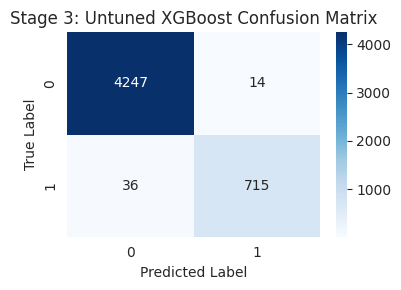

In [168]:
print_metrics(
    model_0_xgb_st3_retrained,
    'Stage 3: Untuned XGBoost',
    X_train_xgb_st3, X_val_xgb_st3, X_test_xgb_st3,
    y_train_st3, y_val_st3, y_test_st3,
    threshold=0.5,
)

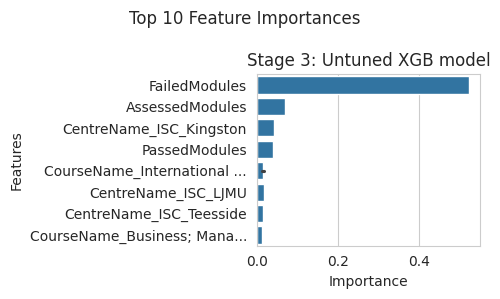

In [169]:
# feature importance
plot_feature_importance(
    [model_0_xgb_st3_retrained],
    ['Stage 3: Untuned XGB model'],
    X_test_xgb_st3, 10)

**Comments:**
* The model achieves near perfect performance in predicting student dropout.
* All three newly added features in Stage 3 are in top 5 important features and the feature 'FailedModules' is highly dominant

## NN

In [172]:
# define arbitrary layers
baseline_model_layers = [
    {'no_of_neurons': 8, 'activation': 'relu', 'kernel_regularization': None},
    {'no_of_neurons': 64, 'activation': 'relu', 'kernel_regularization': None},
]
#class weight
class_weight = {0: 1, 1: 3}

# create model using predefined function with dropout to reduce overfitting
model_0_nn_st3=create_model(
    input_dim=(X_train_nn_st3.shape[1],),
    model_layers=baseline_model_layers,
    optimizer=Adam(),
    dropout_rate=0.25
    )

In [173]:
# fit model with early stopping
try:
    if tf.config.list_physical_devices('GPU'):
        device = '/GPU:0'
    else:
        device = '/CPU:0'
except Exception:
    device = '/CPU:0'

tf.random.set_seed(random_seed) #set for reproducability
with tf.device(device):
  history_model_0_nn_st3 = model_0_nn_st3.fit(
      X_train_nn_st3, y_train_st3,
      epochs=100,
      batch_size=32,
      validation_data=(X_val_nn_st3, y_val_st3),
      verbose=0,
      class_weight=class_weight,
      callbacks=[
          EarlyStopping(
              monitor="val_loss",
              patience=10,
              restore_best_weights=True
          )
      ]
  )

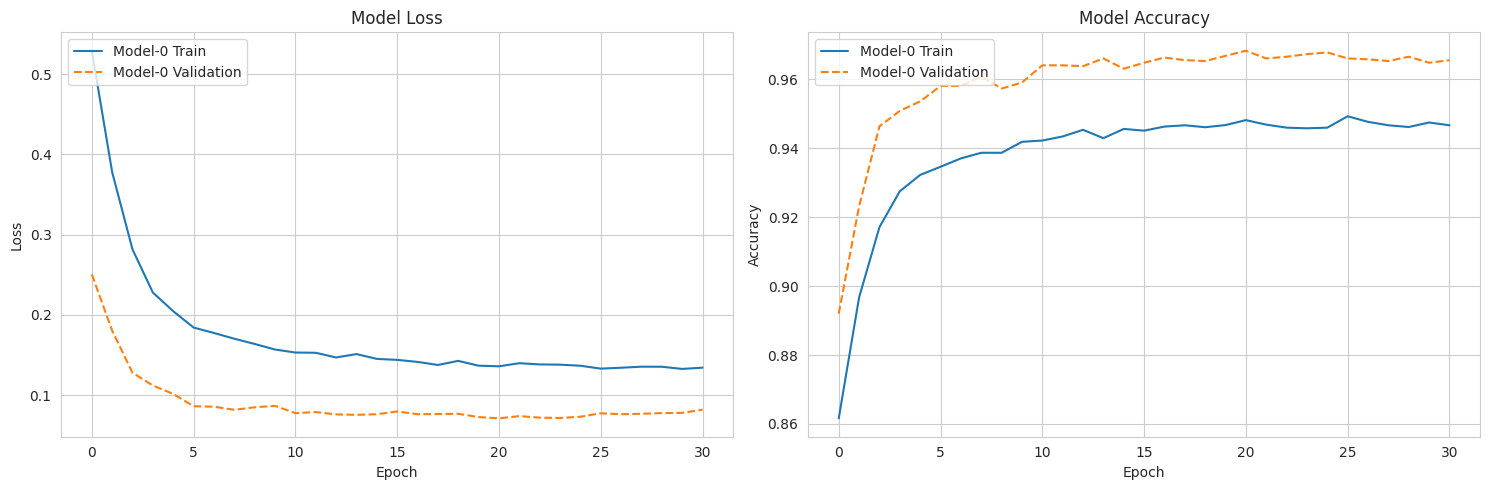

In [174]:
plot_histories(
    [history_model_0_nn_st3],
    ['Model-0']
)

In [176]:
## retrain baseline model on full train+val dataset

#extract optimum epochs from previous fit
baseline_epochs_nn_st3 = get_best_epoch_from_history(history_model_0_nn_st3)

# clone previous baseline
model_0_nn_st3_retrained = keras.models.clone_model(model_0_nn_st3)
model_0_nn_st3_retrained.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=[
        'accuracy',
        keras.metrics.F1Score(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
    ]
)

# Fit on the full training + validation set
model_0_nn_st3_retrained.fit(
    X_full_nn_st3, y_full_st3,
    epochs=int(baseline_epochs_nn_st3*1.2), #higher epoch count to account
                                          # for larger dataset
    class_weight=class_weight,
    batch_size=32,
    verbose=0,
)

Best epoch: 21
Number of epochs run: 31


+-----------------------------------------------------------+
|                    Stage 3: Untuned NN                    |
+-----------+-------+------------+-------+------------------+
|   Metric  | Train | Validation |  Test | Test vs Train Δ% |
+-----------+-------+------------+-------+------------------+
|  accuracy | 0.958 |   0.958    | 0.945 |      -1.3%       |
| precision | 0.792 |   0.790    | 0.753 |      -4.8%       |
|   recall  | 0.976 |   0.978    | 0.944 |      -3.3%       |
|     f1    | 0.874 |   0.874    | 0.838 |      -4.1%       |
|    auc    | 0.990 |   0.992    | 0.985 |      -0.5%       |
+-----------+-------+------------+-------+------------------+


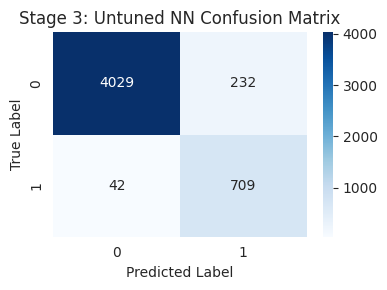

In [193]:
print_metrics(
    model_0_nn_st3_retrained,
    'Stage 3: Untuned NN',
    X_train_nn_st3, X_val_nn_st3, X_test_nn_st3,
    y_train_st3, y_val_st3, y_test_st3,
    threshold=0.5,
)

**Comments:**
* Similar to the XGB model, the Neural Network achieves very high accuracy in prediction although performance in inferior to the XGB, especially in preicsion.

## Stage Comparison

+-------------------------------------------------------------------------------------------+
|                 Test Set Metric Comparison Across Stages (Threshold: 0.5)                 |
+-----------+-------------+-------------+-------------+------------+-----------+------------+
|   Metric  | Stage 1:XGB | Stage 2:XGB | Stage 3:XGB | Stage 1:NN | Stage2:NN | Stage 3:NN |
+-----------+-------------+-------------+-------------+------------+-----------+------------+
|  accuracy |    0.871    |    0.891    |    0.990    |   0.878    |   0.882   |   0.945    |
| precision |    0.552    |    0.612    |    0.981    |   0.576    |   0.579   |   0.753    |
|   recall  |    0.739    |    0.746    |    0.952    |   0.718    |   0.783   |   0.944    |
|     f1    |    0.632    |    0.672    |    0.966    |   0.639    |   0.666   |   0.838    |
|    auc    |    0.888    |    0.918    |    0.999    |   0.880    |   0.907   |   0.985    |
+-----------+-------------+-------------+-------------+-----

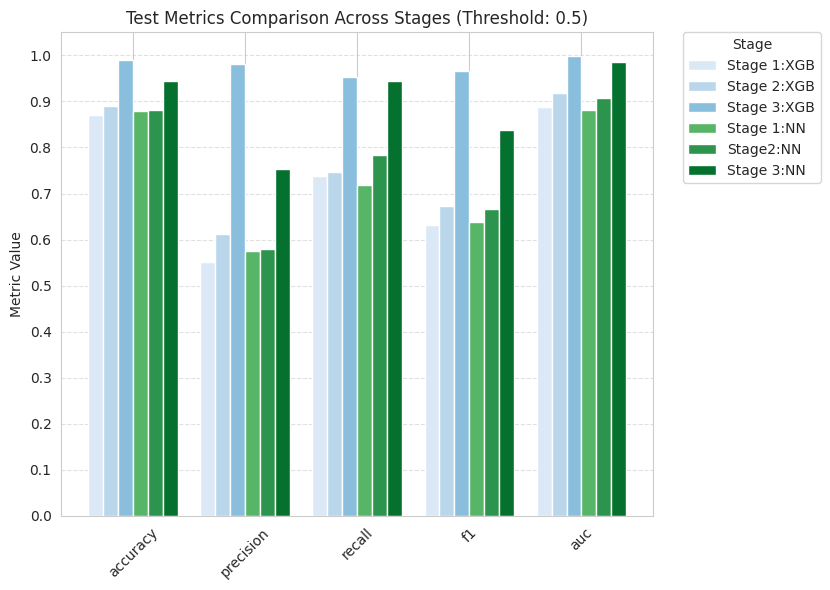

In [183]:
# compare untuned models across stages
compare_stages_on_test(
    stage_labels=[
        "Stage 1:XGB", "Stage 2:XGB", "Stage 3:XGB",
        "Stage 1:NN", "Stage2:NN", "Stage 3:NN",
    ],
    stage_models=[
        model_0_xgb_st1_retrained, model_0_xgb_st2_retrained, model_0_xgb_st3_retrained,
        model_0_nn_st1_retrained, model_0_nn_st2_retrained, model_0_nn_st3_retrained
    ],
    stage_data=[
        (X_test_xgb_st1, y_test_st1),
        (X_test_xgb_st2, y_test_st2),
        (X_test_xgb_st3, y_test_st3),
        (X_test_nn_st1, y_test_st1),
        (X_test_nn_st2, y_test_st2),
        (X_test_nn_st3, y_test_st3),
        ],
    threshold=threshold
)

**Comments:**
* There's a dramatic improvement in model performance with the new features added in Stage 3 (data related to academic performance)
* This is seen in all metrics for both types of models.
* The improvement is much bigger than was gained from tuning in the previous stages reflecting the impact of having right features.


# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.
